## 구글 드라이브를 mount하고 워킹 디렉토리를 설정

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/datasets

/content/drive/MyDrive/datasets


## 2020년 2학기부터 2022년 1학기까지의 강의력과 comment를 이용하여 2020년 1학기 강의평에 비어있는 feature인 강의력을 predict하는 과정

In [ ]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:8 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:14 http://ppa.launchpad.net

In [39]:
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 115 (delta 11), reused 10 (delta 3), pack-reused 91
Receiving objects: 100% (115/115), 1.27 MiB | 12.63 MiB/s, done.
Resolving deltas: 100% (50/50), done.
/content/drive/MyDrive/datasets/Mecab-ko-for-Google-Colab
Installing konlpy.....
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2022-12-21 08:45:36--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 18.205.93.2, 18.205.93.1, 18.205.93.0, ...
Connecting to bitbucket.org (bitbucket.org)|18.205.93.2|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruplo

In [3]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
from tqdm import tqdm
from konlpy.tag import Mecab
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [27]:
import os
path = os.getcwd() + '/'
data = pd.read_csv(path + 'klue.csv')
data = data.drop(columns = ["year", "type", "subject", "professor", "day", "satisfy", "writer", "ratings0", "ratings1","ratings2", "ratings3", "helpful"])
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42, shuffle=True)

In [28]:
train_data.head()

,Unnamed: 0,ratings4,comment
1498,1498,4,중간까지는 꿀강이었는데 후반에 강화학습 배울 때는 진짜 어려워집니다.\n설마 여기서...
3088,3088,4,교수님께서는 착하신 것 같은데\n노베이스가 듣기에는 조금 막막했습니다.\n그래도 기...
1158,1158,5,"학생들 입장을 많이 생각해 주셔서 명확한 평가기준, 후한채점, 이해될때까지 쉬운 설..."
2016,2016,3,매 주 1시간 가량 컴과 여러 교수님들이 오셔서 자신의 전문 분야를 강의해 주시고 ...
4160,4160,5,교수님께서 강의력이 좋으십니다. 다만 양이 많아서 개인적으로 따라가기 힘들었다고 생...


In [29]:
label = []
for row in tqdm(train_data['ratings4']):
    if row > 3 : # training set의 강의력이 3보다 크면 label을 1, 아니면 0으로 지정
      label.append(1)
    else :
      label.append(0)
train_data['label'] = label

label = []
for row in tqdm(test_data['ratings4']):
    if row > 3 :
      label.append(1)
    else :
      label.append(0)
test_data['label'] = label

100%|██████████| 1060/1060 [00:00<00:00, 951822.36it/s]


In [7]:
train_data.head()

,Unnamed: 0,ratings4,comment,label
1498,1498,4,중간까지는 꿀강이었는데 후반에 강화학습 배울 때는 진짜 어려워집니다.\n설마 여기서...,1
3088,3088,4,교수님께서는 착하신 것 같은데\n노베이스가 듣기에는 조금 막막했습니다.\n그래도 기...,1
1158,1158,5,"학생들 입장을 많이 생각해 주셔서 명확한 평가기준, 후한채점, 이해될때까지 쉬운 설...",1
2016,2016,3,매 주 1시간 가량 컴과 여러 교수님들이 오셔서 자신의 전문 분야를 강의해 주시고 ...,0
4160,4160,5,교수님께서 강의력이 좋으십니다. 다만 양이 많아서 개인적으로 따라가기 힘들었다고 생...,1


In [30]:
train_data['comment'] = train_data['comment'].str.replace(r"[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", regex=True)
train_data['comment'] = train_data['comment'].str.replace(r'^ +', "", regex=True)

test_data['comment'] = test_data['comment'].str.replace(r"[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", regex=True)
test_data['comment'] = test_data['comment'].str.replace(r'^ +', "", regex=True)

In [31]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [32]:
mecab = Mecab()
X_train = []
for sentence in tqdm(train_data['comment']):
    X_train.append([word for word in mecab.morphs(sentence) if not word in stopwords])
X_test = []
for sentence in tqdm(test_data['comment']):
    X_test.append([word for word in mecab.morphs(sentence) if not word in stopwords])

100%|██████████| 1060/1060 [00:00<00:00, 1079.20it/s]


In [33]:
len(X_train)

4237

In [34]:
tmp = X_train
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tmp)

In [35]:
print(tokenizer.word_index)

{'하': 1, '을': 2, '습니다': 3, '고': 4, '강의': 5, '있': 6, '주': 7, '시': 8, '수업': 9, '게': 10, '것': 11, '님': 12, '과제': 13, '교수': 14, '었': 15, '시험': 16, '면': 17, '지': 18, '수': 19, '다': 20, '같': 21, '추천': 22, '기': 23, '않': 24, '문제': 25, '로': 26, '좋': 27, '는데': 28, '내용': 29, '해': 30, '학점': 31, '적': 32, '지만': 33, '되': 34, '만': 35, '았': 36, '보': 37, '했': 38, '없': 39, '많': 40, '합니다': 41, '어': 42, '에서': 43, '공부': 44, '시간': 45, '할': 46, '받': 47, '십니다': 48, '입니다': 49, '안': 50, '중간': 51, '생각': 52, '던': 53, '셔서': 54, '많이': 55, '정도': 56, '번': 57, '설명': 58, '때': 59, '듣': 60, '어렵': 61, '기말': 62, '풀': 63, '정말': 64, '력': 65, '셨': 66, '이해': 67, '인': 68, '출석': 69, '때문': 70, '학생': 71, '께서': 72, '진행': 73, '어서': 74, '분': 75, '거': 76, '난이도': 77, '점수': 78, '학기': 79, '라': 80, '나': 81, '중간고사': 82, '편': 83, '부분': 84, '과목': 85, '아': 86, '보다': 87, '나오': 88, '쉽': 89, '해서': 90, '였': 91, '기말고사': 92, '음': 93, '매우': 94, '점': 95, '열심히': 96, '조금': 97, '까지': 98, '너무': 99, '신': 100, '성적': 101, '다고': 102, '저': 103, '거의': 104, '아니':

In [36]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # traiing set의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 pair를 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 8763
등장 빈도가 2번 이하인 희귀 단어의 수: 4729
단어 집합에서 희귀 단어의 비율: 53.96553691658108
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.6771619178253008


In [37]:
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 4035


## Model Training

In [38]:
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)

tokenizer.fit_on_texts(X_test)
X_test = tokenizer.texts_to_sequences(X_test)

In [39]:
y_train = np.array(train_data['label'])
y_test = np.array(test_data['label'])

In [40]:
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)

/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


리뷰의 최대 길이 : 1673
리뷰의 평균 길이 : 82.07712325526379


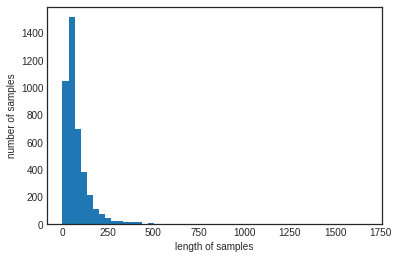

In [41]:
print('리뷰의 최대 길이 :',max(len(review) for review in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [42]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [43]:
max_len = 200
below_threshold_len(max_len, X_train)
# 6.2%만의 comment가 200을 초과하는 길이를 가지기 때문에 최대 길이를 200으로 제한하여도 큰 성능 저하가 없을 것으로 예상됨

전체 샘플 중 길이가 200 이하인 샘플의 비율: 93.8017506505796


In [44]:
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [45]:
from tensorflow.keras.layers import Embedding, Dense, LSTM, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 200 # parameter의 개수가 지나치게 커지는 것을 방지하기 위하여 comment의 최대 길이를 200으로 제한
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 200)         807000    
                                                                 
 lstm (LSTM)                 (None, 128)               168448    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 975,577
Trainable params: 975,577
Non-trainable params: 0
_________________________________________________________________


In [46]:
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Epoch 1/15
53/53 [==============================] - ETA: 0s - loss: 0.6084 - acc: 0.6770
Epoch 1: val_acc improved from -inf to 0.68913, saving model to best_model.h5
53/53 [==============================] - 52s 926ms/step - loss: 0.6084 - acc: 0.6770 - val_loss: 0.5821 - val_acc: 0.6891
Epoch 2/15
53/53 [==============================] - ETA: 0s - loss: 0.5031 - acc: 0.7616
Epoch 2: val_acc improved from 0.68913 to 0.70449, saving model to best_model.h5
53/53 [==============================] - 38s 724ms/step - loss: 0.5031 - acc: 0.7616 - val_loss: 0.5704 - val_acc: 0.7045
Epoch 3/15
53/53 [==============================] - ETA: 0s - loss: 0.4350 - acc: 0.8089
Epoch 3: val_acc improved from 0.70449 to 0.74113, saving model to best_model.h5
53/53 [==============================] - 46s 879ms/step - loss: 0.4350 - acc: 0.8089 - val_loss: 0.5537 - val_acc: 0.7411
Epoch 4/15
53/53 [==============================] - ETA: 0s - loss: 0.3600 - acc: 0.8474
Epoch 4: val_acc did not improve from 

In [47]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

34/34 [==============================] - 7s 179ms/step - loss: 0.6822 - acc: 0.6547

 테스트 정확도: 0.6547


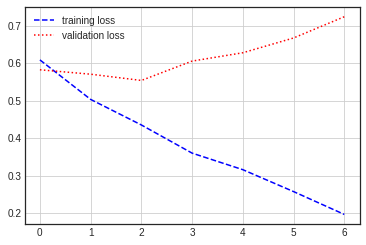

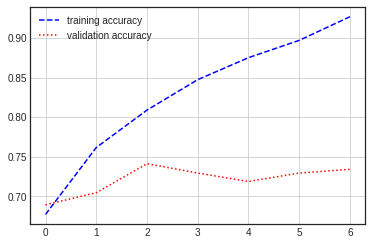

In [48]:
hist_dict = history.history
loss = hist_dict['loss']
val_loss = hist_dict['val_loss']
acc = hist_dict['acc']
val_acc = hist_dict['val_acc']

plt.plot(loss, 'b--', label='training loss')
plt.plot(val_loss, 'r:', label='validation loss')
plt.legend()
plt.grid()

plt.figure()
plt.plot(acc, 'b--', label='training accuracy')
plt.plot(val_acc, 'r:', label='validation accuracy')
plt.legend()
plt.grid()

## 2020년 1학기의 강의력 feature를 predict하는 과정

In [49]:
def predict(sentence):
  sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', sentence)
  sentence = mecab.morphs(sentence) # 토큰화
  sentence = [word for word in sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(loaded_model.predict(pad_new)) # 예측
  return score

In [50]:
df_predict = pd.read_csv(path + '2020-1.csv')

In [51]:
ratings4 = []
for row in tqdm(df_predict['comment']):
    score = predict(row)
    if score >= 0.8 :
      ratings4.append(5)
    elif score >= 0.6 :
      ratings4.append(4)
    elif score >= 0.4 :
      ratings4.append(3)
    elif score >= 0.2 :
      ratings4.append(2)
    else:
      ratings4.append(1)
df_predict['ratings4'] = ratings4
df_predict.to_csv("added.csv", mode='w')

  0%|          | 0/628 [00:00<?, ?it/s]

1/1 [==============================] - 1s 808ms/step


  0%|          | 1/628 [00:00<09:52,  1.06it/s]

1/1 [==============================] - 0s 48ms/step


  0%|          | 2/628 [00:01<04:49,  2.16it/s]

1/1 [==============================] - 0s 46ms/step


  0%|          | 3/628 [00:01<03:15,  3.19it/s]

1/1 [==============================] - 0s 44ms/step


  1%|          | 4/628 [00:01<02:26,  4.26it/s]

1/1 [==============================] - 0s 57ms/step


  1%|          | 5/628 [00:01<02:01,  5.15it/s]

1/1 [==============================] - 0s 51ms/step


  1%|          | 6/628 [00:01<01:55,  5.40it/s]

1/1 [==============================] - 0s 44ms/step


  1%|          | 7/628 [00:01<01:41,  6.14it/s]

1/1 [==============================] - 0s 40ms/step


  1%|▏         | 8/628 [00:01<01:32,  6.74it/s]

1/1 [==============================] - 0s 46ms/step


  1%|▏         | 9/628 [00:01<01:32,  6.66it/s]

1/1 [==============================] - 0s 36ms/step


  2%|▏         | 10/628 [00:02<01:28,  7.02it/s]

1/1 [==============================] - 0s 55ms/step


  2%|▏         | 11/628 [00:02<01:36,  6.37it/s]

1/1 [==============================] - 0s 51ms/step


  2%|▏         | 12/628 [00:02<01:33,  6.57it/s]

1/1 [==============================] - 0s 44ms/step


  2%|▏         | 13/628 [00:02<01:25,  7.20it/s]

1/1 [==============================] - 0s 53ms/step


  2%|▏         | 14/628 [00:02<01:24,  7.28it/s]

1/1 [==============================] - 0s 39ms/step


  2%|▏         | 15/628 [00:02<01:17,  7.92it/s]

1/1 [==============================] - 0s 42ms/step


  3%|▎         | 16/628 [00:02<01:15,  8.10it/s]

1/1 [==============================] - 0s 59ms/step


  3%|▎         | 17/628 [00:03<01:17,  7.84it/s]

1/1 [==============================] - 0s 47ms/step


  3%|▎         | 18/628 [00:03<01:14,  8.24it/s]

1/1 [==============================] - 0s 40ms/step


  3%|▎         | 19/628 [00:03<01:21,  7.50it/s]

1/1 [==============================] - 0s 50ms/step


  3%|▎         | 21/628 [00:03<01:18,  7.72it/s]

1/1 [==============================] - 0s 58ms/step


  4%|▎         | 22/628 [00:03<01:17,  7.77it/s]

1/1 [==============================] - 0s 48ms/step


  4%|▎         | 23/628 [00:03<01:21,  7.41it/s]

1/1 [==============================] - 0s 41ms/step


  4%|▍         | 24/628 [00:03<01:16,  7.90it/s]

1/1 [==============================] - 0s 43ms/step


  4%|▍         | 25/628 [00:04<01:12,  8.30it/s]

1/1 [==============================] - 0s 47ms/step


  4%|▍         | 26/628 [00:04<01:13,  8.19it/s]

1/1 [==============================] - 0s 44ms/step


  4%|▍         | 27/628 [00:04<01:11,  8.40it/s]

1/1 [==============================] - 0s 55ms/step


  4%|▍         | 28/628 [00:04<01:14,  8.08it/s]

1/1 [==============================] - 0s 44ms/step


  5%|▍         | 29/628 [00:04<01:13,  8.19it/s]

1/1 [==============================] - 0s 47ms/step


  5%|▍         | 30/628 [00:04<01:12,  8.21it/s]

1/1 [==============================] - 0s 44ms/step


  5%|▍         | 31/628 [00:04<01:11,  8.35it/s]

1/1 [==============================] - 0s 55ms/step


  5%|▌         | 32/628 [00:04<01:13,  8.06it/s]

1/1 [==============================] - 0s 44ms/step


  5%|▌         | 33/628 [00:05<01:11,  8.27it/s]

1/1 [==============================] - 0s 40ms/step


  5%|▌         | 34/628 [00:05<01:09,  8.57it/s]

1/1 [==============================] - 0s 39ms/step


  6%|▌         | 35/628 [00:05<01:06,  8.89it/s]

1/1 [==============================] - 0s 45ms/step


  6%|▌         | 36/628 [00:05<01:08,  8.66it/s]

1/1 [==============================] - 0s 50ms/step


  6%|▌         | 37/628 [00:05<01:08,  8.62it/s]

1/1 [==============================] - 0s 75ms/step


  6%|▌         | 38/628 [00:05<01:14,  7.90it/s]

1/1 [==============================] - 0s 39ms/step


  6%|▌         | 39/628 [00:05<01:11,  8.22it/s]

1/1 [==============================] - 0s 44ms/step


  6%|▋         | 40/628 [00:05<01:11,  8.22it/s]

1/1 [==============================] - 0s 44ms/step


  7%|▋         | 41/628 [00:05<01:07,  8.66it/s]

1/1 [==============================] - 0s 42ms/step


  7%|▋         | 42/628 [00:06<01:07,  8.65it/s]

1/1 [==============================] - 0s 38ms/step


  7%|▋         | 43/628 [00:06<01:06,  8.77it/s]

1/1 [==============================] - 0s 62ms/step


  7%|▋         | 44/628 [00:06<01:08,  8.57it/s]

1/1 [==============================] - 0s 44ms/step


  7%|▋         | 45/628 [00:06<01:07,  8.69it/s]

1/1 [==============================] - 0s 44ms/step


  7%|▋         | 46/628 [00:06<01:06,  8.79it/s]

1/1 [==============================] - 0s 46ms/step


  7%|▋         | 47/628 [00:06<01:05,  8.90it/s]

1/1 [==============================] - 0s 45ms/step


  8%|▊         | 48/628 [00:06<01:03,  9.18it/s]

1/1 [==============================] - 0s 54ms/step


  8%|▊         | 49/628 [00:06<01:06,  8.74it/s]

1/1 [==============================] - 0s 41ms/step


  8%|▊         | 50/628 [00:06<01:05,  8.82it/s]

1/1 [==============================] - 0s 46ms/step


  8%|▊         | 51/628 [00:07<01:06,  8.66it/s]

1/1 [==============================] - 0s 50ms/step


  8%|▊         | 52/628 [00:07<01:06,  8.65it/s]

1/1 [==============================] - 0s 45ms/step


  8%|▊         | 53/628 [00:07<01:05,  8.72it/s]

1/1 [==============================] - 0s 52ms/step


  9%|▊         | 54/628 [00:07<01:13,  7.82it/s]

1/1 [==============================] - 0s 49ms/step


  9%|▉         | 55/628 [00:07<01:13,  7.79it/s]

1/1 [==============================] - 0s 46ms/step


  9%|▉         | 56/628 [00:07<01:11,  7.96it/s]

1/1 [==============================] - 0s 51ms/step


  9%|▉         | 57/628 [00:07<01:09,  8.18it/s]

1/1 [==============================] - 0s 43ms/step


  9%|▉         | 58/628 [00:07<01:07,  8.45it/s]

1/1 [==============================] - 0s 42ms/step


  9%|▉         | 59/628 [00:08<01:05,  8.67it/s]

1/1 [==============================] - 0s 45ms/step


 10%|▉         | 60/628 [00:08<01:04,  8.84it/s]

1/1 [==============================] - 0s 39ms/step


 10%|▉         | 61/628 [00:08<01:05,  8.72it/s]

1/1 [==============================] - 0s 60ms/step


 10%|▉         | 62/628 [00:08<01:11,  7.87it/s]

1/1 [==============================] - 0s 43ms/step


 10%|█         | 63/628 [00:08<01:10,  8.07it/s]

1/1 [==============================] - 0s 56ms/step


 10%|█         | 64/628 [00:08<01:09,  8.11it/s]

1/1 [==============================] - 0s 46ms/step


 10%|█         | 65/628 [00:08<01:07,  8.34it/s]

1/1 [==============================] - 0s 48ms/step


 11%|█         | 66/628 [00:08<01:08,  8.24it/s]

1/1 [==============================] - 0s 49ms/step


 11%|█         | 67/628 [00:09<01:07,  8.33it/s]

1/1 [==============================] - 0s 36ms/step


 11%|█         | 68/628 [00:09<01:07,  8.28it/s]

1/1 [==============================] - 0s 43ms/step


 11%|█         | 69/628 [00:09<01:04,  8.66it/s]

1/1 [==============================] - 0s 42ms/step


 11%|█         | 70/628 [00:09<01:04,  8.66it/s]

1/1 [==============================] - 0s 41ms/step


 11%|█▏        | 71/628 [00:09<01:07,  8.19it/s]

1/1 [==============================] - 0s 40ms/step


 11%|█▏        | 72/628 [00:09<01:06,  8.38it/s]

1/1 [==============================] - 0s 60ms/step


 12%|█▏        | 74/628 [00:09<01:04,  8.60it/s]

1/1 [==============================] - 0s 45ms/step


 12%|█▏        | 75/628 [00:09<01:05,  8.50it/s]

1/1 [==============================] - 0s 44ms/step


 12%|█▏        | 76/628 [00:10<01:09,  7.94it/s]

1/1 [==============================] - 0s 44ms/step


 12%|█▏        | 77/628 [00:10<01:10,  7.81it/s]

1/1 [==============================] - 0s 60ms/step


 13%|█▎        | 79/628 [00:10<01:05,  8.33it/s]

1/1 [==============================] - 0s 40ms/step


 13%|█▎        | 80/628 [00:10<01:08,  7.95it/s]

1/1 [==============================] - 0s 41ms/step


 13%|█▎        | 81/628 [00:10<01:07,  8.08it/s]

1/1 [==============================] - 0s 48ms/step


 13%|█▎        | 82/628 [00:10<01:06,  8.23it/s]

1/1 [==============================] - 0s 45ms/step


 13%|█▎        | 83/628 [00:10<01:04,  8.45it/s]

1/1 [==============================] - 0s 46ms/step


 13%|█▎        | 84/628 [00:11<01:02,  8.75it/s]

1/1 [==============================] - 0s 47ms/step


 14%|█▎        | 85/628 [00:11<01:00,  8.96it/s]

1/1 [==============================] - 0s 39ms/step


 14%|█▎        | 86/628 [00:11<01:00,  8.97it/s]

1/1 [==============================] - 0s 43ms/step


 14%|█▍        | 87/628 [00:11<00:58,  9.18it/s]

1/1 [==============================] - 0s 39ms/step


 14%|█▍        | 88/628 [00:11<01:02,  8.60it/s]

1/1 [==============================] - 0s 48ms/step


 14%|█▍        | 90/628 [00:11<00:57,  9.38it/s]

1/1 [==============================] - 0s 33ms/step


 14%|█▍        | 91/628 [00:11<00:56,  9.49it/s]

1/1 [==============================] - 0s 44ms/step


 15%|█▍        | 93/628 [00:12<00:58,  9.14it/s]

1/1 [==============================] - 0s 39ms/step


 15%|█▌        | 95/628 [00:12<00:53,  9.95it/s]

1/1 [==============================] - 0s 46ms/step


 15%|█▌        | 96/628 [00:12<00:57,  9.26it/s]

1/1 [==============================] - 0s 41ms/step


 15%|█▌        | 97/628 [00:12<00:58,  9.12it/s]

1/1 [==============================] - 0s 53ms/step


 16%|█▌        | 98/628 [00:12<00:58,  8.99it/s]

1/1 [==============================] - 0s 34ms/step


 16%|█▌        | 100/628 [00:12<00:54,  9.65it/s]

1/1 [==============================] - 0s 44ms/step


 16%|█▌        | 102/628 [00:13<00:56,  9.37it/s]

1/1 [==============================] - 0s 38ms/step


 17%|█▋        | 104/628 [00:13<00:53,  9.87it/s]

1/1 [==============================] - 0s 39ms/step


 17%|█▋        | 106/628 [00:13<00:54,  9.55it/s]

1/1 [==============================] - 0s 42ms/step


 17%|█▋        | 107/628 [00:13<00:54,  9.51it/s]

1/1 [==============================] - 0s 42ms/step


 17%|█▋        | 108/628 [00:13<00:54,  9.56it/s]

1/1 [==============================] - 0s 38ms/step


 17%|█▋        | 109/628 [00:13<00:53,  9.66it/s]

1/1 [==============================] - 0s 37ms/step


 18%|█▊        | 111/628 [00:13<00:52,  9.81it/s]

1/1 [==============================] - 0s 35ms/step


 18%|█▊        | 113/628 [00:14<00:51, 10.08it/s]

1/1 [==============================] - 0s 45ms/step


 18%|█▊        | 115/628 [00:14<00:50, 10.21it/s]

1/1 [==============================] - 0s 41ms/step


 19%|█▊        | 117/628 [00:14<00:50, 10.07it/s]

1/1 [==============================] - 0s 37ms/step


 19%|█▉        | 119/628 [00:14<00:49, 10.27it/s]

1/1 [==============================] - 0s 38ms/step


 19%|█▉        | 121/628 [00:14<00:48, 10.46it/s]

1/1 [==============================] - 0s 36ms/step


 20%|█▉        | 123/628 [00:15<00:48, 10.34it/s]

1/1 [==============================] - 0s 45ms/step


 20%|█▉        | 125/628 [00:15<00:48, 10.40it/s]

1/1 [==============================] - 0s 122ms/step


 20%|██        | 127/628 [00:15<01:15,  6.61it/s]

1/1 [==============================] - 0s 57ms/step


 20%|██        | 128/628 [00:16<01:25,  5.85it/s]

1/1 [==============================] - 0s 105ms/step


 21%|██        | 129/628 [00:16<01:34,  5.30it/s]

1/1 [==============================] - 0s 34ms/step


 21%|██        | 130/628 [00:16<01:25,  5.80it/s]

1/1 [==============================] - 0s 40ms/step


 21%|██        | 132/628 [00:16<01:15,  6.59it/s]

1/1 [==============================] - 0s 34ms/step


 21%|██▏       | 134/628 [00:16<01:04,  7.63it/s]

1/1 [==============================] - 0s 36ms/step


 22%|██▏       | 136/628 [00:17<00:56,  8.69it/s]

1/1 [==============================] - 0s 43ms/step


 22%|██▏       | 138/628 [00:17<00:55,  8.81it/s]

1/1 [==============================] - 0s 43ms/step


 22%|██▏       | 139/628 [00:17<00:54,  8.92it/s]

1/1 [==============================] - 0s 34ms/step


 22%|██▏       | 141/628 [00:17<00:51,  9.54it/s]

1/1 [==============================] - 0s 52ms/step


 23%|██▎       | 142/628 [00:17<00:54,  8.96it/s]

1/1 [==============================] - 0s 37ms/step


 23%|██▎       | 143/628 [00:17<00:53,  9.08it/s]

1/1 [==============================] - 0s 84ms/step


 23%|██▎       | 145/628 [00:18<00:56,  8.52it/s]

1/1 [==============================] - 0s 68ms/step


 23%|██▎       | 146/628 [00:18<00:58,  8.25it/s]

1/1 [==============================] - 0s 64ms/step


 23%|██▎       | 147/628 [00:18<01:08,  7.05it/s]

1/1 [==============================] - 0s 37ms/step


 24%|██▎       | 148/628 [00:18<01:10,  6.85it/s]

1/1 [==============================] - 0s 59ms/step


 24%|██▍       | 150/628 [00:18<01:00,  7.86it/s]

1/1 [==============================] - 0s 57ms/step


 24%|██▍       | 151/628 [00:18<01:03,  7.49it/s]

1/1 [==============================] - 0s 69ms/step


 24%|██▍       | 152/628 [00:19<01:07,  7.05it/s]

1/1 [==============================] - 0s 62ms/step


 24%|██▍       | 153/628 [00:19<01:08,  6.90it/s]

1/1 [==============================] - 0s 62ms/step


 25%|██▍       | 154/628 [00:19<01:11,  6.66it/s]

1/1 [==============================] - 0s 73ms/step


 25%|██▍       | 155/628 [00:19<01:14,  6.36it/s]

1/1 [==============================] - 0s 67ms/step


 25%|██▍       | 156/628 [00:19<01:15,  6.25it/s]

1/1 [==============================] - 0s 68ms/step


 25%|██▌       | 157/628 [00:19<01:15,  6.28it/s]

1/1 [==============================] - 0s 86ms/step


 25%|██▌       | 158/628 [00:20<01:15,  6.21it/s]

1/1 [==============================] - 0s 44ms/step


 25%|██▌       | 159/628 [00:20<01:13,  6.42it/s]

1/1 [==============================] - 0s 34ms/step


 26%|██▌       | 161/628 [00:20<00:57,  8.14it/s]

1/1 [==============================] - 0s 33ms/step


 26%|██▌       | 162/628 [00:20<00:54,  8.48it/s]

1/1 [==============================] - 0s 63ms/step


 26%|██▌       | 164/628 [00:20<00:51,  8.96it/s]

1/1 [==============================] - 0s 68ms/step


 26%|██▋       | 165/628 [00:20<00:53,  8.58it/s]

1/1 [==============================] - 0s 96ms/step


 26%|██▋       | 166/628 [00:21<01:11,  6.45it/s]

1/1 [==============================] - 0s 71ms/step


 27%|██▋       | 167/628 [00:21<01:10,  6.53it/s]

1/1 [==============================] - 0s 72ms/step


 27%|██▋       | 168/628 [00:21<01:15,  6.13it/s]

1/1 [==============================] - 0s 72ms/step


 27%|██▋       | 169/628 [00:21<01:16,  5.98it/s]

1/1 [==============================] - 0s 82ms/step


 27%|██▋       | 170/628 [00:21<01:16,  6.01it/s]

1/1 [==============================] - 0s 74ms/step


 27%|██▋       | 171/628 [00:21<01:21,  5.58it/s]

1/1 [==============================] - 0s 60ms/step


 27%|██▋       | 172/628 [00:22<01:16,  5.95it/s]

1/1 [==============================] - 0s 106ms/step


 28%|██▊       | 173/628 [00:22<01:19,  5.69it/s]

1/1 [==============================] - 0s 81ms/step


 28%|██▊       | 174/628 [00:22<01:21,  5.55it/s]

1/1 [==============================] - 0s 142ms/step


 28%|██▊       | 175/628 [00:22<01:45,  4.31it/s]

1/1 [==============================] - 0s 108ms/step


 28%|██▊       | 176/628 [00:23<01:53,  3.99it/s]

1/1 [==============================] - 0s 67ms/step


 28%|██▊       | 177/628 [00:23<01:42,  4.41it/s]

1/1 [==============================] - 0s 117ms/step


 28%|██▊       | 178/628 [00:23<01:44,  4.29it/s]

1/1 [==============================] - 0s 114ms/step


 29%|██▊       | 179/628 [00:23<01:52,  3.99it/s]

1/1 [==============================] - 0s 99ms/step


 29%|██▊       | 180/628 [00:24<01:55,  3.88it/s]

1/1 [==============================] - 0s 114ms/step


 29%|██▉       | 181/628 [00:24<01:49,  4.09it/s]

1/1 [==============================] - 0s 93ms/step


 29%|██▉       | 182/628 [00:24<01:40,  4.44it/s]

1/1 [==============================] - 0s 96ms/step


 29%|██▉       | 183/628 [00:24<01:38,  4.52it/s]

1/1 [==============================] - 0s 111ms/step


 29%|██▉       | 184/628 [00:24<01:38,  4.52it/s]

1/1 [==============================] - 0s 90ms/step


 29%|██▉       | 185/628 [00:25<01:42,  4.31it/s]

1/1 [==============================] - 0s 41ms/step


 30%|██▉       | 186/628 [00:25<01:25,  5.18it/s]

1/1 [==============================] - 0s 48ms/step


 30%|██▉       | 187/628 [00:25<01:19,  5.56it/s]

1/1 [==============================] - 0s 41ms/step


 30%|██▉       | 188/628 [00:25<01:10,  6.24it/s]

1/1 [==============================] - 0s 49ms/step


 30%|███       | 189/628 [00:25<01:07,  6.47it/s]

1/1 [==============================] - 0s 46ms/step


 30%|███       | 190/628 [00:25<01:02,  6.99it/s]

1/1 [==============================] - 0s 36ms/step


 30%|███       | 191/628 [00:25<00:58,  7.45it/s]

1/1 [==============================] - 0s 70ms/step


 31%|███       | 192/628 [00:26<01:00,  7.22it/s]

1/1 [==============================] - 0s 39ms/step


 31%|███       | 193/628 [00:26<00:56,  7.67it/s]

1/1 [==============================] - 0s 56ms/step


 31%|███       | 194/628 [00:26<00:55,  7.80it/s]

1/1 [==============================] - 0s 50ms/step


 31%|███       | 195/628 [00:26<00:57,  7.53it/s]

1/1 [==============================] - 0s 45ms/step


 31%|███       | 196/628 [00:26<00:55,  7.74it/s]

1/1 [==============================] - 0s 88ms/step


 31%|███▏      | 197/628 [00:26<01:11,  6.06it/s]

1/1 [==============================] - 0s 74ms/step


 32%|███▏      | 198/628 [00:27<01:11,  6.01it/s]

1/1 [==============================] - 0s 71ms/step


 32%|███▏      | 199/628 [00:27<01:16,  5.61it/s]

1/1 [==============================] - 0s 111ms/step


 32%|███▏      | 200/628 [00:27<01:21,  5.27it/s]

1/1 [==============================] - 0s 72ms/step


 32%|███▏      | 201/628 [00:27<01:24,  5.03it/s]

1/1 [==============================] - 0s 63ms/step


 32%|███▏      | 202/628 [00:27<01:16,  5.56it/s]

1/1 [==============================] - 0s 74ms/step


 32%|███▏      | 203/628 [00:27<01:14,  5.67it/s]

1/1 [==============================] - 0s 73ms/step


 32%|███▏      | 204/628 [00:28<01:15,  5.63it/s]

1/1 [==============================] - 0s 78ms/step


 33%|███▎      | 205/628 [00:28<01:14,  5.72it/s]

1/1 [==============================] - 0s 40ms/step


 33%|███▎      | 206/628 [00:28<01:06,  6.39it/s]

1/1 [==============================] - 0s 49ms/step


 33%|███▎      | 207/628 [00:28<01:00,  6.99it/s]

1/1 [==============================] - 0s 34ms/step


 33%|███▎      | 209/628 [00:28<00:48,  8.59it/s]

1/1 [==============================] - 0s 67ms/step


 33%|███▎      | 210/628 [00:28<00:52,  7.90it/s]

1/1 [==============================] - 0s 53ms/step


 34%|███▎      | 211/628 [00:29<00:55,  7.48it/s]

1/1 [==============================] - 0s 55ms/step


 34%|███▍      | 212/628 [00:29<00:58,  7.15it/s]

1/1 [==============================] - 0s 33ms/step


 34%|███▍      | 213/628 [00:29<00:54,  7.65it/s]

1/1 [==============================] - 0s 39ms/step


 34%|███▍      | 214/628 [00:29<00:51,  8.07it/s]

1/1 [==============================] - 0s 76ms/step


 34%|███▍      | 215/628 [00:29<00:56,  7.28it/s]

1/1 [==============================] - 0s 67ms/step


 34%|███▍      | 216/628 [00:29<01:01,  6.68it/s]

1/1 [==============================] - 0s 39ms/step


 35%|███▍      | 217/628 [00:29<00:56,  7.29it/s]

1/1 [==============================] - 0s 75ms/step


 35%|███▍      | 219/628 [00:30<00:50,  8.04it/s]

1/1 [==============================] - 0s 41ms/step


 35%|███▌      | 220/628 [00:30<00:49,  8.16it/s]

1/1 [==============================] - 0s 39ms/step


 35%|███▌      | 222/628 [00:30<00:45,  8.83it/s]

1/1 [==============================] - 0s 71ms/step


 36%|███▌      | 223/628 [00:30<00:52,  7.69it/s]

1/1 [==============================] - 0s 81ms/step


 36%|███▌      | 224/628 [00:30<00:55,  7.30it/s]

1/1 [==============================] - 0s 35ms/step


 36%|███▌      | 225/628 [00:30<00:53,  7.48it/s]

1/1 [==============================] - 0s 37ms/step


 36%|███▌      | 227/628 [00:31<00:45,  8.89it/s]

1/1 [==============================] - 0s 76ms/step


 36%|███▋      | 228/628 [00:31<00:49,  8.10it/s]

1/1 [==============================] - 0s 56ms/step


 36%|███▋      | 229/628 [00:31<00:47,  8.38it/s]

1/1 [==============================] - 0s 54ms/step


 37%|███▋      | 231/628 [00:31<00:45,  8.76it/s]

1/1 [==============================] - 0s 32ms/step


 37%|███▋      | 233/628 [00:31<00:41,  9.45it/s]

1/1 [==============================] - 0s 71ms/step


 37%|███▋      | 234/628 [00:31<00:45,  8.67it/s]

1/1 [==============================] - 0s 43ms/step


 37%|███▋      | 235/628 [00:31<00:46,  8.47it/s]

1/1 [==============================] - 0s 50ms/step


 38%|███▊      | 237/628 [00:32<00:43,  9.04it/s]

1/1 [==============================] - 0s 38ms/step


 38%|███▊      | 239/628 [00:32<00:40,  9.68it/s]

1/1 [==============================] - 0s 64ms/step


 38%|███▊      | 240/628 [00:32<00:43,  9.02it/s]

1/1 [==============================] - 0s 64ms/step


 38%|███▊      | 241/628 [00:32<00:46,  8.28it/s]

1/1 [==============================] - 0s 66ms/step


 39%|███▊      | 242/628 [00:32<00:50,  7.62it/s]

1/1 [==============================] - 0s 58ms/step


 39%|███▊      | 243/628 [00:32<00:52,  7.33it/s]

1/1 [==============================] - 0s 43ms/step


 39%|███▉      | 244/628 [00:33<00:52,  7.26it/s]

1/1 [==============================] - 0s 37ms/step


 39%|███▉      | 246/628 [00:33<00:45,  8.45it/s]

1/1 [==============================] - 0s 77ms/step


 39%|███▉      | 247/628 [00:33<00:49,  7.64it/s]

1/1 [==============================] - 0s 37ms/step


 40%|███▉      | 249/628 [00:33<00:44,  8.51it/s]

1/1 [==============================] - 0s 40ms/step


 40%|███▉      | 250/628 [00:33<00:44,  8.54it/s]

1/1 [==============================] - 0s 48ms/step


 40%|███▉      | 251/628 [00:33<00:43,  8.57it/s]

1/1 [==============================] - 0s 38ms/step


 40%|████      | 253/628 [00:34<00:44,  8.43it/s]

1/1 [==============================] - 0s 39ms/step


 40%|████      | 254/628 [00:34<00:43,  8.61it/s]

1/1 [==============================] - 0s 77ms/step


 41%|████      | 256/628 [00:34<00:44,  8.40it/s]

1/1 [==============================] - 0s 33ms/step


 41%|████      | 257/628 [00:34<00:43,  8.53it/s]

1/1 [==============================] - 0s 36ms/step


 41%|████      | 259/628 [00:34<00:42,  8.60it/s]

1/1 [==============================] - 0s 36ms/step


 42%|████▏     | 261/628 [00:35<00:39,  9.21it/s]

1/1 [==============================] - 0s 57ms/step


 42%|████▏     | 262/628 [00:35<00:42,  8.56it/s]

1/1 [==============================] - 0s 37ms/step


 42%|████▏     | 263/628 [00:35<00:48,  7.49it/s]

1/1 [==============================] - 0s 37ms/step


 42%|████▏     | 264/628 [00:35<00:47,  7.74it/s]

1/1 [==============================] - 0s 84ms/step


 42%|████▏     | 265/628 [00:35<00:48,  7.54it/s]

1/1 [==============================] - 0s 40ms/step


 42%|████▏     | 266/628 [00:35<00:48,  7.53it/s]

1/1 [==============================] - 0s 48ms/step


 43%|████▎     | 268/628 [00:35<00:42,  8.49it/s]

1/1 [==============================] - 0s 65ms/step


 43%|████▎     | 269/628 [00:36<00:44,  8.02it/s]

1/1 [==============================] - 0s 37ms/step


 43%|████▎     | 271/628 [00:36<00:39,  9.13it/s]

1/1 [==============================] - 0s 62ms/step


 43%|████▎     | 272/628 [00:36<00:39,  9.02it/s]

1/1 [==============================] - 0s 57ms/step


 43%|████▎     | 273/628 [00:36<00:45,  7.79it/s]

1/1 [==============================] - 0s 63ms/step


 44%|████▎     | 274/628 [00:36<00:47,  7.51it/s]

1/1 [==============================] - 0s 79ms/step


 44%|████▍     | 275/628 [00:36<00:49,  7.10it/s]

1/1 [==============================] - 0s 136ms/step


 44%|████▍     | 276/628 [00:37<00:59,  5.89it/s]

1/1 [==============================] - 0s 67ms/step


 44%|████▍     | 277/628 [00:37<00:58,  5.95it/s]

1/1 [==============================] - 0s 66ms/step


 44%|████▍     | 278/628 [00:37<00:56,  6.19it/s]

1/1 [==============================] - 0s 37ms/step


 44%|████▍     | 279/628 [00:37<00:55,  6.26it/s]

1/1 [==============================] - 0s 33ms/step


 45%|████▍     | 281/628 [00:37<00:43,  7.93it/s]

1/1 [==============================] - 0s 33ms/step


 45%|████▌     | 283/628 [00:37<00:39,  8.82it/s]

1/1 [==============================] - 0s 43ms/step


 45%|████▌     | 284/628 [00:38<00:38,  8.98it/s]

1/1 [==============================] - 0s 39ms/step


 46%|████▌     | 286/628 [00:38<00:34,  9.84it/s]

1/1 [==============================] - 0s 32ms/step


 46%|████▌     | 287/628 [00:38<00:34,  9.75it/s]

1/1 [==============================] - 0s 49ms/step


 46%|████▌     | 289/628 [00:38<00:34,  9.82it/s]

1/1 [==============================] - 0s 33ms/step


 46%|████▋     | 291/628 [00:38<00:32, 10.31it/s]

1/1 [==============================] - 0s 64ms/step


 47%|████▋     | 293/628 [00:38<00:35,  9.32it/s]

1/1 [==============================] - 0s 72ms/step


 47%|████▋     | 294/628 [00:39<00:39,  8.44it/s]

1/1 [==============================] - 0s 65ms/step


 47%|████▋     | 295/628 [00:39<00:42,  7.90it/s]

1/1 [==============================] - 0s 65ms/step


 47%|████▋     | 296/628 [00:39<00:44,  7.45it/s]

1/1 [==============================] - 0s 99ms/step


 47%|████▋     | 297/628 [00:39<00:50,  6.61it/s]

1/1 [==============================] - 0s 76ms/step


 47%|████▋     | 298/628 [00:39<00:52,  6.25it/s]

1/1 [==============================] - 0s 44ms/step


 48%|████▊     | 299/628 [00:39<00:49,  6.68it/s]

1/1 [==============================] - 0s 36ms/step


 48%|████▊     | 300/628 [00:40<00:44,  7.37it/s]

1/1 [==============================] - 0s 42ms/step


 48%|████▊     | 301/628 [00:40<00:41,  7.79it/s]

1/1 [==============================] - 0s 90ms/step


 48%|████▊     | 302/628 [00:40<00:45,  7.12it/s]

1/1 [==============================] - 0s 36ms/step


 48%|████▊     | 303/628 [00:40<00:41,  7.75it/s]

1/1 [==============================] - 0s 39ms/step


 49%|████▊     | 305/628 [00:40<00:39,  8.14it/s]

1/1 [==============================] - 0s 35ms/step


 49%|████▉     | 307/628 [00:40<00:34,  9.21it/s]

1/1 [==============================] - 0s 65ms/step


 49%|████▉     | 308/628 [00:40<00:37,  8.42it/s]

1/1 [==============================] - 0s 41ms/step


 49%|████▉     | 309/628 [00:41<00:37,  8.41it/s]

1/1 [==============================] - 0s 46ms/step


 50%|████▉     | 311/628 [00:41<00:35,  8.93it/s]

1/1 [==============================] - 0s 64ms/step


 50%|████▉     | 312/628 [00:41<00:39,  7.96it/s]

1/1 [==============================] - 0s 61ms/step


 50%|████▉     | 313/628 [00:41<00:41,  7.51it/s]

1/1 [==============================] - 0s 42ms/step


 50%|█████     | 315/628 [00:41<00:37,  8.41it/s]

1/1 [==============================] - 0s 62ms/step


 50%|█████     | 316/628 [00:41<00:39,  7.96it/s]

1/1 [==============================] - 0s 79ms/step


 50%|█████     | 317/628 [00:42<00:41,  7.47it/s]

1/1 [==============================] - 0s 59ms/step


 51%|█████     | 318/628 [00:42<00:45,  6.78it/s]

1/1 [==============================] - 0s 36ms/step


 51%|█████     | 319/628 [00:42<00:42,  7.28it/s]

1/1 [==============================] - 0s 37ms/step


 51%|█████     | 320/628 [00:42<00:40,  7.70it/s]

1/1 [==============================] - 0s 40ms/step


 51%|█████     | 321/628 [00:42<00:40,  7.57it/s]

1/1 [==============================] - 0s 35ms/step


 51%|█████▏    | 322/628 [00:42<00:37,  8.10it/s]

1/1 [==============================] - 0s 65ms/step


 51%|█████▏    | 323/628 [00:42<00:39,  7.74it/s]

1/1 [==============================] - 0s 39ms/step


 52%|█████▏    | 324/628 [00:43<00:37,  8.10it/s]

1/1 [==============================] - 0s 37ms/step


 52%|█████▏    | 325/628 [00:43<00:35,  8.52it/s]

1/1 [==============================] - 0s 97ms/step


 52%|█████▏    | 326/628 [00:43<00:41,  7.22it/s]

1/1 [==============================] - 0s 38ms/step


 52%|█████▏    | 327/628 [00:43<00:40,  7.42it/s]

1/1 [==============================] - 0s 39ms/step


 52%|█████▏    | 328/628 [00:43<00:38,  7.89it/s]

1/1 [==============================] - 0s 115ms/step


 52%|█████▏    | 329/628 [00:43<00:42,  6.99it/s]

1/1 [==============================] - 0s 69ms/step


 53%|█████▎    | 330/628 [00:43<00:44,  6.75it/s]

1/1 [==============================] - 0s 59ms/step


 53%|█████▎    | 331/628 [00:44<00:45,  6.59it/s]

1/1 [==============================] - 0s 64ms/step


 53%|█████▎    | 332/628 [00:44<00:45,  6.55it/s]

1/1 [==============================] - 0s 54ms/step


 53%|█████▎    | 333/628 [00:44<00:43,  6.73it/s]

1/1 [==============================] - 0s 35ms/step


 53%|█████▎    | 334/628 [00:44<00:42,  6.94it/s]

1/1 [==============================] - 0s 38ms/step


 53%|█████▎    | 335/628 [00:44<00:40,  7.17it/s]

1/1 [==============================] - 0s 46ms/step


 54%|█████▎    | 336/628 [00:44<00:39,  7.48it/s]

1/1 [==============================] - 0s 65ms/step


 54%|█████▎    | 337/628 [00:44<00:37,  7.72it/s]

1/1 [==============================] - 0s 44ms/step


 54%|█████▍    | 339/628 [00:45<00:34,  8.38it/s]

1/1 [==============================] - 0s 41ms/step


 54%|█████▍    | 340/628 [00:45<00:38,  7.50it/s]

1/1 [==============================] - 0s 36ms/step


 54%|█████▍    | 341/628 [00:45<00:36,  7.92it/s]

1/1 [==============================] - 0s 59ms/step


 54%|█████▍    | 342/628 [00:45<00:41,  6.95it/s]

1/1 [==============================] - 0s 57ms/step


 55%|█████▍    | 343/628 [00:45<00:39,  7.22it/s]

1/1 [==============================] - 0s 85ms/step


 55%|█████▍    | 344/628 [00:45<00:42,  6.63it/s]

1/1 [==============================] - 0s 45ms/step


 55%|█████▍    | 345/628 [00:46<00:45,  6.18it/s]

1/1 [==============================] - 0s 39ms/step


 55%|█████▌    | 346/628 [00:46<00:40,  6.95it/s]

1/1 [==============================] - 0s 69ms/step


 55%|█████▌    | 347/628 [00:46<00:39,  7.13it/s]

1/1 [==============================] - 0s 63ms/step


 55%|█████▌    | 348/628 [00:46<00:41,  6.72it/s]

1/1 [==============================] - 0s 72ms/step


 56%|█████▌    | 349/628 [00:46<00:43,  6.47it/s]

1/1 [==============================] - 0s 88ms/step


 56%|█████▌    | 350/628 [00:46<00:45,  6.11it/s]

1/1 [==============================] - 0s 37ms/step


 56%|█████▌    | 352/628 [00:46<00:35,  7.71it/s]

1/1 [==============================] - 0s 79ms/step


 56%|█████▌    | 353/628 [00:47<00:36,  7.55it/s]

1/1 [==============================] - 0s 42ms/step


 56%|█████▋    | 354/628 [00:47<00:37,  7.39it/s]

1/1 [==============================] - 0s 39ms/step


 57%|█████▋    | 355/628 [00:47<00:37,  7.33it/s]

1/1 [==============================] - 0s 67ms/step


 57%|█████▋    | 356/628 [00:47<00:36,  7.38it/s]

1/1 [==============================] - 0s 63ms/step


 57%|█████▋    | 357/628 [00:47<00:38,  7.04it/s]

1/1 [==============================] - 0s 71ms/step


 57%|█████▋    | 358/628 [00:47<00:40,  6.62it/s]

1/1 [==============================] - 0s 64ms/step


 57%|█████▋    | 359/628 [00:48<00:41,  6.50it/s]

1/1 [==============================] - 0s 67ms/step


 57%|█████▋    | 360/628 [00:48<00:42,  6.35it/s]

1/1 [==============================] - 0s 74ms/step


 57%|█████▋    | 361/628 [00:48<00:42,  6.32it/s]

1/1 [==============================] - 0s 91ms/step


 58%|█████▊    | 362/628 [00:48<00:43,  6.08it/s]

1/1 [==============================] - 0s 79ms/step


 58%|█████▊    | 363/628 [00:48<00:44,  5.93it/s]

1/1 [==============================] - 0s 120ms/step


 58%|█████▊    | 364/628 [00:49<00:57,  4.57it/s]

1/1 [==============================] - 0s 116ms/step


 58%|█████▊    | 365/628 [00:49<01:07,  3.87it/s]

1/1 [==============================] - 0s 77ms/step


 58%|█████▊    | 366/628 [00:49<01:09,  3.77it/s]

1/1 [==============================] - 0s 148ms/step


 58%|█████▊    | 367/628 [00:49<01:07,  3.87it/s]

1/1 [==============================] - 0s 52ms/step


 59%|█████▊    | 368/628 [00:50<00:58,  4.45it/s]

1/1 [==============================] - 0s 78ms/step


 59%|█████▉    | 369/628 [00:50<00:55,  4.70it/s]

1/1 [==============================] - 0s 63ms/step


 59%|█████▉    | 370/628 [00:50<00:50,  5.13it/s]

1/1 [==============================] - 0s 75ms/step


 59%|█████▉    | 371/628 [00:50<00:48,  5.33it/s]

1/1 [==============================] - 0s 155ms/step


 59%|█████▉    | 372/628 [00:50<00:57,  4.49it/s]

1/1 [==============================] - 0s 167ms/step


 59%|█████▉    | 373/628 [00:51<01:12,  3.50it/s]

1/1 [==============================] - 0s 113ms/step


 60%|█████▉    | 374/628 [00:51<01:14,  3.41it/s]

1/1 [==============================] - 0s 178ms/step


 60%|█████▉    | 375/628 [00:52<01:23,  3.01it/s]

1/1 [==============================] - 0s 156ms/step


 60%|█████▉    | 376/628 [00:52<01:27,  2.89it/s]

1/1 [==============================] - 0s 85ms/step


 60%|██████    | 377/628 [00:52<01:31,  2.75it/s]

1/1 [==============================] - 0s 168ms/step


 60%|██████    | 378/628 [00:53<01:27,  2.85it/s]

1/1 [==============================] - 0s 32ms/step


 61%|██████    | 380/628 [00:53<00:56,  4.35it/s]

1/1 [==============================] - 0s 88ms/step


 61%|██████    | 381/628 [00:53<00:52,  4.73it/s]

1/1 [==============================] - 0s 68ms/step


 61%|██████    | 382/628 [00:53<00:48,  5.08it/s]

1/1 [==============================] - 0s 66ms/step


 61%|██████    | 383/628 [00:53<00:46,  5.24it/s]

1/1 [==============================] - 0s 91ms/step


 61%|██████    | 384/628 [00:54<00:47,  5.08it/s]

1/1 [==============================] - 0s 65ms/step


 61%|██████▏   | 385/628 [00:54<00:45,  5.31it/s]

1/1 [==============================] - 0s 98ms/step


 61%|██████▏   | 386/628 [00:54<00:49,  4.87it/s]

1/1 [==============================] - 0s 78ms/step


 62%|██████▏   | 387/628 [00:54<00:46,  5.15it/s]

1/1 [==============================] - 0s 131ms/step


 62%|██████▏   | 388/628 [00:54<00:48,  4.93it/s]

1/1 [==============================] - 0s 91ms/step


 62%|██████▏   | 389/628 [00:55<00:52,  4.54it/s]

1/1 [==============================] - 0s 64ms/step


 62%|██████▏   | 390/628 [00:55<00:48,  4.93it/s]

1/1 [==============================] - 0s 90ms/step


 62%|██████▏   | 391/628 [00:55<00:47,  5.04it/s]

1/1 [==============================] - 0s 68ms/step


 62%|██████▏   | 392/628 [00:55<00:51,  4.60it/s]

1/1 [==============================] - 0s 155ms/step


 63%|██████▎   | 393/628 [00:56<01:01,  3.84it/s]

1/1 [==============================] - 0s 96ms/step


 63%|██████▎   | 394/628 [00:56<01:08,  3.41it/s]

1/1 [==============================] - 0s 39ms/step


 63%|██████▎   | 395/628 [00:56<01:00,  3.87it/s]

1/1 [==============================] - 0s 38ms/step


 63%|██████▎   | 396/628 [00:56<00:49,  4.68it/s]

1/1 [==============================] - 0s 41ms/step


 63%|██████▎   | 398/628 [00:56<00:35,  6.39it/s]

1/1 [==============================] - 0s 38ms/step


 64%|██████▎   | 399/628 [00:57<00:32,  6.99it/s]

1/1 [==============================] - 0s 40ms/step


 64%|██████▎   | 400/628 [00:57<00:30,  7.56it/s]

1/1 [==============================] - 0s 33ms/step


 64%|██████▍   | 402/628 [00:57<00:25,  8.79it/s]

1/1 [==============================] - 0s 40ms/step


 64%|██████▍   | 404/628 [00:57<00:23,  9.44it/s]

1/1 [==============================] - 0s 38ms/step


 65%|██████▍   | 406/628 [00:57<00:22,  9.96it/s]

1/1 [==============================] - 0s 37ms/step


 65%|██████▍   | 408/628 [00:57<00:22,  9.88it/s]

1/1 [==============================] - 0s 35ms/step


 65%|██████▌   | 410/628 [00:58<00:21, 10.29it/s]

1/1 [==============================] - 0s 59ms/step


 66%|██████▌   | 412/628 [00:58<00:21, 10.23it/s]

1/1 [==============================] - 0s 32ms/step


 66%|██████▌   | 414/628 [00:58<00:20, 10.65it/s]

1/1 [==============================] - 0s 43ms/step


 66%|██████▌   | 416/628 [00:58<00:20, 10.15it/s]

1/1 [==============================] - 0s 33ms/step


 67%|██████▋   | 418/628 [00:58<00:20, 10.21it/s]

1/1 [==============================] - 0s 35ms/step


 67%|██████▋   | 420/628 [00:59<00:20, 10.35it/s]

1/1 [==============================] - 0s 38ms/step


 67%|██████▋   | 422/628 [00:59<00:19, 10.54it/s]

1/1 [==============================] - 0s 37ms/step


 68%|██████▊   | 424/628 [00:59<00:19, 10.25it/s]

1/1 [==============================] - 0s 36ms/step


 68%|██████▊   | 426/628 [00:59<00:19, 10.46it/s]

1/1 [==============================] - 0s 37ms/step


 68%|██████▊   | 428/628 [00:59<00:19, 10.42it/s]

1/1 [==============================] - 0s 32ms/step


 68%|██████▊   | 430/628 [00:59<00:18, 10.46it/s]

1/1 [==============================] - 0s 33ms/step


 69%|██████▉   | 432/628 [01:00<00:18, 10.56it/s]

1/1 [==============================] - 0s 34ms/step


 69%|██████▉   | 434/628 [01:00<00:18, 10.40it/s]

1/1 [==============================] - 0s 36ms/step


 69%|██████▉   | 436/628 [01:00<00:18, 10.22it/s]

1/1 [==============================] - 0s 50ms/step


 70%|██████▉   | 438/628 [01:00<00:19,  9.93it/s]

1/1 [==============================] - 0s 44ms/step


 70%|██████▉   | 439/628 [01:00<00:19,  9.88it/s]

1/1 [==============================] - 0s 47ms/step


 70%|███████   | 441/628 [01:01<00:18,  9.98it/s]

1/1 [==============================] - 0s 36ms/step


 70%|███████   | 442/628 [01:01<00:18,  9.96it/s]

1/1 [==============================] - 0s 39ms/step


 71%|███████   | 443/628 [01:01<00:18,  9.79it/s]

1/1 [==============================] - 0s 35ms/step


 71%|███████   | 444/628 [01:01<00:18,  9.82it/s]

1/1 [==============================] - 0s 40ms/step


 71%|███████   | 445/628 [01:01<00:20,  9.08it/s]

1/1 [==============================] - 0s 39ms/step


 71%|███████   | 446/628 [01:01<00:20,  8.69it/s]

1/1 [==============================] - 0s 49ms/step


 71%|███████   | 447/628 [01:01<00:20,  8.64it/s]

1/1 [==============================] - 0s 37ms/step


 71%|███████▏  | 449/628 [01:01<00:18,  9.52it/s]

1/1 [==============================] - 0s 37ms/step


 72%|███████▏  | 451/628 [01:02<00:17, 10.06it/s]

1/1 [==============================] - 0s 34ms/step


 72%|███████▏  | 453/628 [01:02<00:16, 10.41it/s]

1/1 [==============================] - 0s 45ms/step


 72%|███████▏  | 455/628 [01:02<00:17, 10.17it/s]

1/1 [==============================] - 0s 35ms/step


 73%|███████▎  | 457/628 [01:02<00:16, 10.18it/s]

1/1 [==============================] - 0s 34ms/step


 73%|███████▎  | 459/628 [01:02<00:17,  9.69it/s]

1/1 [==============================] - 0s 34ms/step


 73%|███████▎  | 460/628 [01:03<00:17,  9.73it/s]

1/1 [==============================] - 0s 32ms/step


 74%|███████▎  | 462/628 [01:03<00:16, 10.13it/s]

1/1 [==============================] - 0s 43ms/step


 74%|███████▍  | 464/628 [01:03<00:16, 10.11it/s]

1/1 [==============================] - 0s 36ms/step


 74%|███████▍  | 466/628 [01:03<00:15, 10.33it/s]

1/1 [==============================] - 0s 36ms/step


 75%|███████▍  | 468/628 [01:03<00:15, 10.28it/s]

1/1 [==============================] - 0s 36ms/step


 75%|███████▍  | 470/628 [01:03<00:15, 10.29it/s]

1/1 [==============================] - 0s 33ms/step


 75%|███████▌  | 472/628 [01:04<00:15, 10.23it/s]

1/1 [==============================] - 0s 32ms/step


 75%|███████▌  | 474/628 [01:04<00:14, 10.65it/s]

1/1 [==============================] - 0s 37ms/step


 76%|███████▌  | 476/628 [01:04<00:14, 10.54it/s]

1/1 [==============================] - 0s 38ms/step


 76%|███████▌  | 478/628 [01:04<00:14, 10.39it/s]

1/1 [==============================] - 0s 40ms/step


 76%|███████▋  | 480/628 [01:04<00:15,  9.63it/s]

1/1 [==============================] - 0s 33ms/step


 77%|███████▋  | 481/628 [01:05<00:15,  9.63it/s]

1/1 [==============================] - 0s 38ms/step


 77%|███████▋  | 483/628 [01:05<00:14,  9.79it/s]

1/1 [==============================] - 0s 37ms/step


 77%|███████▋  | 485/628 [01:05<00:14,  9.99it/s]

1/1 [==============================] - 0s 32ms/step


 78%|███████▊  | 487/628 [01:05<00:13, 10.14it/s]

1/1 [==============================] - 0s 35ms/step


 78%|███████▊  | 489/628 [01:05<00:13, 10.13it/s]

1/1 [==============================] - 0s 33ms/step


 78%|███████▊  | 491/628 [01:06<00:13, 10.38it/s]

1/1 [==============================] - 0s 34ms/step


 79%|███████▊  | 493/628 [01:06<00:12, 10.40it/s]

1/1 [==============================] - 0s 32ms/step


 79%|███████▉  | 495/628 [01:06<00:12, 10.79it/s]

1/1 [==============================] - 0s 35ms/step


 79%|███████▉  | 497/628 [01:06<00:12, 10.08it/s]

1/1 [==============================] - 0s 38ms/step


 79%|███████▉  | 499/628 [01:06<00:13,  9.78it/s]

1/1 [==============================] - 0s 40ms/step


 80%|███████▉  | 500/628 [01:06<00:13,  9.76it/s]

1/1 [==============================] - 0s 104ms/step


 80%|███████▉  | 501/628 [01:07<00:15,  8.12it/s]

1/1 [==============================] - 0s 114ms/step


 80%|███████▉  | 502/628 [01:07<00:19,  6.48it/s]

1/1 [==============================] - 0s 98ms/step


 80%|████████  | 503/628 [01:07<00:21,  5.75it/s]

1/1 [==============================] - 0s 59ms/step


 80%|████████  | 504/628 [01:07<00:21,  5.86it/s]

1/1 [==============================] - 0s 57ms/step


 80%|████████  | 505/628 [01:07<00:20,  6.09it/s]

1/1 [==============================] - 0s 162ms/step


 81%|████████  | 506/628 [01:08<00:23,  5.15it/s]

1/1 [==============================] - 0s 85ms/step


 81%|████████  | 507/628 [01:08<00:23,  5.20it/s]

1/1 [==============================] - 0s 63ms/step


 81%|████████  | 508/628 [01:08<00:25,  4.80it/s]

1/1 [==============================] - 0s 71ms/step


 81%|████████  | 509/628 [01:08<00:23,  5.00it/s]

1/1 [==============================] - 0s 76ms/step


 81%|████████  | 510/628 [01:09<00:22,  5.34it/s]

1/1 [==============================] - 0s 108ms/step


 81%|████████▏ | 511/628 [01:09<00:22,  5.14it/s]

1/1 [==============================] - 0s 36ms/step


 82%|████████▏ | 512/628 [01:09<00:19,  5.80it/s]

1/1 [==============================] - 0s 46ms/step


 82%|████████▏ | 513/628 [01:09<00:17,  6.59it/s]

1/1 [==============================] - 0s 33ms/step


 82%|████████▏ | 515/628 [01:09<00:14,  8.02it/s]

1/1 [==============================] - 0s 34ms/step


 82%|████████▏ | 517/628 [01:09<00:12,  9.16it/s]

1/1 [==============================] - 0s 35ms/step


 82%|████████▏ | 518/628 [01:09<00:12,  9.09it/s]

1/1 [==============================] - 0s 37ms/step


 83%|████████▎ | 520/628 [01:10<00:11,  9.78it/s]

1/1 [==============================] - 0s 37ms/step


 83%|████████▎ | 522/628 [01:10<00:10, 10.20it/s]

1/1 [==============================] - 0s 42ms/step


 83%|████████▎ | 524/628 [01:10<00:10, 10.20it/s]

1/1 [==============================] - 0s 40ms/step


 84%|████████▍ | 526/628 [01:10<00:09, 10.24it/s]

1/1 [==============================] - 0s 36ms/step


 84%|████████▍ | 528/628 [01:10<00:10,  9.95it/s]

1/1 [==============================] - 0s 38ms/step


 84%|████████▍ | 530/628 [01:11<00:09, 10.37it/s]

1/1 [==============================] - 0s 35ms/step


 85%|████████▍ | 532/628 [01:11<00:09, 10.04it/s]

1/1 [==============================] - 0s 34ms/step


 85%|████████▌ | 534/628 [01:11<00:09, 10.33it/s]

1/1 [==============================] - 0s 43ms/step


 85%|████████▌ | 536/628 [01:11<00:08, 10.31it/s]

1/1 [==============================] - 0s 39ms/step


 86%|████████▌ | 538/628 [01:11<00:09,  9.99it/s]

1/1 [==============================] - 0s 32ms/step


 86%|████████▌ | 540/628 [01:12<00:09,  9.23it/s]

1/1 [==============================] - 0s 35ms/step


 86%|████████▋ | 542/628 [01:12<00:08,  9.72it/s]

1/1 [==============================] - 0s 41ms/step


 86%|████████▋ | 543/628 [01:12<00:08,  9.65it/s]

1/1 [==============================] - 0s 35ms/step


 87%|████████▋ | 545/628 [01:12<00:08, 10.05it/s]

1/1 [==============================] - 0s 34ms/step


 87%|████████▋ | 547/628 [01:12<00:07, 10.44it/s]

1/1 [==============================] - 0s 36ms/step


 87%|████████▋ | 549/628 [01:12<00:07, 10.25it/s]

1/1 [==============================] - 0s 35ms/step


 88%|████████▊ | 551/628 [01:13<00:07, 10.54it/s]

1/1 [==============================] - 0s 37ms/step


 88%|████████▊ | 553/628 [01:13<00:07, 10.60it/s]

1/1 [==============================] - 0s 33ms/step


 88%|████████▊ | 555/628 [01:13<00:06, 10.51it/s]

1/1 [==============================] - 0s 42ms/step


 89%|████████▊ | 557/628 [01:13<00:06, 10.43it/s]

1/1 [==============================] - 0s 35ms/step


 89%|████████▉ | 559/628 [01:13<00:06, 10.20it/s]

1/1 [==============================] - 0s 33ms/step


 89%|████████▉ | 561/628 [01:14<00:06, 10.52it/s]

1/1 [==============================] - 0s 37ms/step


 90%|████████▉ | 563/628 [01:14<00:06, 10.31it/s]

1/1 [==============================] - 0s 34ms/step


 90%|████████▉ | 565/628 [01:14<00:06, 10.49it/s]

1/1 [==============================] - 0s 35ms/step


 90%|█████████ | 567/628 [01:14<00:05, 10.45it/s]

1/1 [==============================] - 0s 43ms/step


 91%|█████████ | 569/628 [01:14<00:05, 10.03it/s]

1/1 [==============================] - 0s 37ms/step


 91%|█████████ | 571/628 [01:15<00:05, 10.20it/s]

1/1 [==============================] - 0s 35ms/step


 91%|█████████ | 573/628 [01:15<00:05, 10.47it/s]

1/1 [==============================] - 0s 37ms/step


 92%|█████████▏| 575/628 [01:15<00:05, 10.44it/s]

1/1 [==============================] - 0s 40ms/step


 92%|█████████▏| 577/628 [01:15<00:04, 10.23it/s]

1/1 [==============================] - 0s 42ms/step


 92%|█████████▏| 579/628 [01:15<00:04,  9.84it/s]

1/1 [==============================] - 0s 34ms/step


 92%|█████████▏| 580/628 [01:16<00:05,  9.53it/s]

1/1 [==============================] - 0s 35ms/step


 93%|█████████▎| 581/628 [01:16<00:04,  9.49it/s]

1/1 [==============================] - 0s 38ms/step


 93%|█████████▎| 583/628 [01:16<00:04,  9.75it/s]

1/1 [==============================] - 0s 33ms/step


 93%|█████████▎| 584/628 [01:16<00:04,  9.80it/s]

1/1 [==============================] - 0s 39ms/step


 93%|█████████▎| 585/628 [01:16<00:04,  9.58it/s]

1/1 [==============================] - 0s 39ms/step


 93%|█████████▎| 586/628 [01:16<00:04,  8.91it/s]

1/1 [==============================] - 0s 40ms/step


 94%|█████████▎| 588/628 [01:16<00:04,  9.35it/s]

1/1 [==============================] - 0s 32ms/step


 94%|█████████▍| 589/628 [01:16<00:04,  9.41it/s]

1/1 [==============================] - 0s 37ms/step


 94%|█████████▍| 590/628 [01:17<00:04,  9.39it/s]

1/1 [==============================] - 0s 47ms/step


 94%|█████████▍| 591/628 [01:17<00:04,  9.14it/s]

1/1 [==============================] - 0s 41ms/step


 94%|█████████▍| 593/628 [01:17<00:03,  9.14it/s]

1/1 [==============================] - 0s 34ms/step


 95%|█████████▍| 595/628 [01:17<00:03,  9.56it/s]

1/1 [==============================] - 0s 33ms/step


 95%|█████████▍| 596/628 [01:17<00:03,  9.57it/s]

1/1 [==============================] - 0s 36ms/step


 95%|█████████▌| 598/628 [01:17<00:02, 10.01it/s]

1/1 [==============================] - 0s 39ms/step


 95%|█████████▌| 599/628 [01:17<00:02,  9.74it/s]

1/1 [==============================] - 0s 36ms/step


 96%|█████████▌| 600/628 [01:18<00:02,  9.78it/s]

1/1 [==============================] - 0s 33ms/step


 96%|█████████▌| 601/628 [01:18<00:03,  8.99it/s]

1/1 [==============================] - 0s 41ms/step


 96%|█████████▌| 603/628 [01:18<00:02,  9.46it/s]

1/1 [==============================] - 0s 36ms/step


 96%|█████████▌| 604/628 [01:18<00:02,  9.51it/s]

1/1 [==============================] - 0s 36ms/step


 96%|█████████▋| 605/628 [01:18<00:02,  9.41it/s]

1/1 [==============================] - 0s 58ms/step


 96%|█████████▋| 606/628 [01:18<00:02,  9.12it/s]

1/1 [==============================] - 0s 37ms/step


 97%|█████████▋| 607/628 [01:18<00:02,  8.64it/s]

1/1 [==============================] - 0s 48ms/step


 97%|█████████▋| 608/628 [01:19<00:02,  8.70it/s]

1/1 [==============================] - 0s 39ms/step


 97%|█████████▋| 609/628 [01:19<00:02,  8.88it/s]

1/1 [==============================] - 0s 40ms/step


 97%|█████████▋| 610/628 [01:19<00:02,  8.77it/s]

1/1 [==============================] - 0s 39ms/step


 97%|█████████▋| 611/628 [01:19<00:01,  8.92it/s]

1/1 [==============================] - 0s 41ms/step


 97%|█████████▋| 612/628 [01:19<00:01,  8.93it/s]

1/1 [==============================] - 0s 37ms/step


 98%|█████████▊| 613/628 [01:19<00:01,  9.08it/s]

1/1 [==============================] - 0s 42ms/step


 98%|█████████▊| 615/628 [01:19<00:01,  9.74it/s]

1/1 [==============================] - 0s 43ms/step


 98%|█████████▊| 616/628 [01:19<00:01,  9.45it/s]

1/1 [==============================] - 0s 41ms/step


 98%|█████████▊| 617/628 [01:19<00:01,  9.03it/s]

1/1 [==============================] - 0s 34ms/step


 99%|█████████▊| 619/628 [01:20<00:00,  9.91it/s]

1/1 [==============================] - 0s 46ms/step


 99%|█████████▊| 620/628 [01:20<00:00,  9.60it/s]

1/1 [==============================] - 0s 37ms/step


 99%|█████████▉| 622/628 [01:20<00:00,  9.84it/s]

1/1 [==============================] - 0s 34ms/step


 99%|█████████▉| 623/628 [01:20<00:00,  9.80it/s]

1/1 [==============================] - 0s 39ms/step


 99%|█████████▉| 624/628 [01:20<00:00,  9.76it/s]

1/1 [==============================] - 0s 37ms/step


100%|█████████▉| 625/628 [01:20<00:00,  9.62it/s]

1/1 [==============================] - 0s 33ms/step


100%|█████████▉| 626/628 [01:20<00:00,  9.58it/s]

1/1 [==============================] - 0s 40ms/step


100%|█████████▉| 627/628 [01:21<00:00,  9.45it/s]

1/1 [==============================] - 0s 36ms/step


100%|██████████| 628/628 [01:21<00:00,  7.74it/s]


최종 데이터프레임 생성

In [320]:
df1 = pd.read_csv(path + "added.csv",index_col=0)
df2 = pd.read_csv(path + "klue.csv",index_col=0)

In [331]:
df = pd.concat([df1, df2], axis = 0)

In [332]:
df.head()

,Unnamed: 0.1,year,type,subject,professor,day,satisfy,writer,ratings0,ratings1,ratings2,ratings3,comment,helpful,ratings4
0,0.0,20-1,COSE341,운영체제,유혁,#화(6) 목(6),5,상승형곡선,2,2,4.0,5,코로나임에도 불구하고 최대한 학생들과 소통하시려고 노력하시는 참교수님이십니다.\n개...,도움이 돼요 1,1
1,1.0,20-1,COSE341,운영체제,유혁,#화(6) 목(6),3,하락형곡선,2,3,4.0,2,<2020-1 코로나 시기에 작성된 강의평가입니다>\n\n큼지막한 과제가 총 2개(...,도움이 돼요 1,1
2,2.0,20-1,COSE341,운영체제,유혁,#화(6) 목(6),4,lalalala,4,3,4.0,4,"배우는 내용들을 잘 엮어서 설명해주십니다\n암기보다는 이해를 중요시하시는데, 그것이...",도움이 돼요 1,2
3,3.0,20-1,COSE341,운영체제,유혁,#화(6) 목(6),5,김해경,4,4,3.0,4,교수님이 정말 따뜻하시고 그 어떤 질문에도 친절하고 상세하게 답해주십니다. 매번 질...,도움이 돼요 0,5
4,4.0,20-1,COSE341,운영체제,유혁,#화(6) 목(6),5,9minem,3,4,4.0,4,시험은 조금 어렵긴하지만 정말 재밌어요!,도움이 돼요 0,3


## Clustering 과정

데이터프레임 전처리

In [333]:
len(df[df['ratings2'].isnull()])

5

In [334]:
df = df.drop(columns = ['Unnamed: 0.1'])
df = df.dropna(axis=0)
df.columns = ["year", "type", "subject", "professor", "day", "satisfy", "writer", "ratings0", "ratings1", "ratings2", "ratings3", "comment", "helpful", "ratings4"]
df.head(5)

,year,type,subject,professor,day,satisfy,writer,ratings0,ratings1,ratings2,ratings3,comment,helpful,ratings4
0,20-1,COSE341,운영체제,유혁,#화(6) 목(6),5,상승형곡선,2,2,4.0,5,코로나임에도 불구하고 최대한 학생들과 소통하시려고 노력하시는 참교수님이십니다.\n개...,도움이 돼요 1,1
1,20-1,COSE341,운영체제,유혁,#화(6) 목(6),3,하락형곡선,2,3,4.0,2,<2020-1 코로나 시기에 작성된 강의평가입니다>\n\n큼지막한 과제가 총 2개(...,도움이 돼요 1,1
2,20-1,COSE341,운영체제,유혁,#화(6) 목(6),4,lalalala,4,3,4.0,4,"배우는 내용들을 잘 엮어서 설명해주십니다\n암기보다는 이해를 중요시하시는데, 그것이...",도움이 돼요 1,2
3,20-1,COSE341,운영체제,유혁,#화(6) 목(6),5,김해경,4,4,3.0,4,교수님이 정말 따뜻하시고 그 어떤 질문에도 친절하고 상세하게 답해주십니다. 매번 질...,도움이 돼요 0,5
4,20-1,COSE341,운영체제,유혁,#화(6) 목(6),5,9minem,3,4,4.0,4,시험은 조금 어렵긴하지만 정말 재밌어요!,도움이 돼요 0,3


유의미하지 않은 column을 없애는 과정

1. year
2. writer
3. comment - 추후 wordcloud를 그리는 과정에 사용될 feature이기 때문에 제외
4. subject - 강의평에 따라 강의 유형을 구분하는 문제에서 전공 과목 자체가 강의 유형을 구분하는데는 부족하다는 판단
5. type - 학수번호
6. professor
7. helpful - 강의평이 받은 추천 수

In [335]:
df = df.drop(columns = ['year', 'writer', 'comment', 'subject', 'type', 'professor', 'helpful'])
df.head(5)

,day,satisfy,ratings0,ratings1,ratings2,ratings3,ratings4
0,#화(6) 목(6),5,2,2,4.0,5,1
1,#화(6) 목(6),3,2,3,4.0,2,1
2,#화(6) 목(6),4,4,3,4.0,4,2
3,#화(6) 목(6),5,4,4,3.0,4,5
4,#화(6) 목(6),5,3,4,4.0,4,3


날짜 및 교시 추출

교시는 모든 수업 날짜 중 가장 빠른 교시를 기준으로 추출함

In [336]:
import re

mon = []
tue = []
wed = []
thu = []
fri = []
period = []
for d in df['day']:
  period.append(min(map(int, re.findall(r'\d', d))))
  mon.append(1 if '월' in d else 0)
  tue.append(1 if '화' in d else 0)
  wed.append(1 if '수' in d else 0)
  thu.append(1 if '목' in d else 0)
  fri.append(1 if '금' in d else 0)

df['mon'] = mon
df['tue'] = tue
df['wed'] = wed
df['thu'] = thu
df['fri'] = fri
df['period'] = period
df = df.drop(columns = ['day'])

In [514]:
df.head(5)

,satisfy,ratings0,ratings1,ratings2,ratings3,ratings4,mon,tue,wed,thu,fri,period,cluster
0,5,2,2,4.0,5,1,0,1,0,1,0,6,0
1,3,2,3,4.0,2,1,0,1,0,1,0,6,0
2,4,4,3,4.0,4,2,0,1,0,1,0,6,0
3,5,4,4,3.0,4,5,0,1,0,1,0,6,1
4,5,3,4,4.0,4,3,0,1,0,1,0,6,1


## Model 1: PCA + Lloyd K-Means

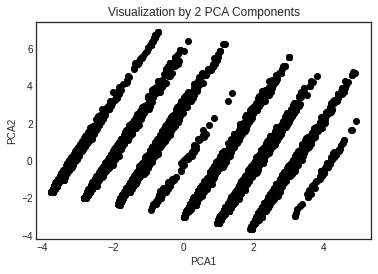

In [463]:
from sklearn.decomposition import PCA
df_pca = df.copy()

pca = PCA(n_components = 2)
pca_transformed = pca.fit_transform(df_pca)

df_pca['x'] = pca_transformed[:, 0]
df_pca['y'] = pca_transformed[:, 1]

plt.scatter(x = df_pca['x'], y = df_pca['y'], color = 'k', alpha = 1)

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Visualization by 2 PCA Components')
plt.show()

K값 찾기

K: 2	Inertia: 234.38855643867885	Difference: -234.38855643867885
K: 3	Inertia: 165.52634019348037	Difference: 68.86221624519848
K: 4	Inertia: 113.7545025707991	Difference: 51.77183762268126
K: 5	Inertia: 94.19533545830546	Difference: 19.55916711249364
K: 6	Inertia: 80.014207295622	Difference: 14.181128162683464
K: 7	Inertia: 68.36643574234218	Difference: 11.647771553279824
K: 8	Inertia: 60.41336909861742	Difference: 7.953066643724753
K: 9	Inertia: 52.91950648599951	Difference: 7.49386261261791
K: 10	Inertia: 46.89418941193796	Difference: 6.0253170740615545


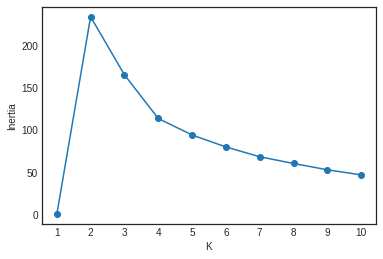

In [471]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

df_kmeans = df_pca.copy()

scaler = MinMaxScaler()
X = scaler.fit_transform(df_kmeans[['x', 'y']])

inertia = [0, ]
for i in range(2, 11):
  model = KMeans(n_clusters = i, random_state = 0)
  model.fit(X)
  inertia.append(model.inertia_)

  print('K: {}\tInertia: {}'.format(i, model.inertia_), end = '\t')

  if i > 1:
    print('Difference: {}'.format(inertia[i-2] - inertia[i-1]))
  else:
    print()

plt.plot(range(1, 11), inertia, marker = 'o')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.show()

In [472]:
# 클러스터 수 = 4
model = KMeans(n_clusters = 4, random_state = 0)
model.fit(X)

df['cluster'] = model.fit_predict(X)
df.head(5)

,satisfy,ratings0,ratings1,ratings2,ratings3,ratings4,mon,tue,wed,thu,fri,period,cluster
0,5,2,2,4.0,5,1,0,1,0,1,0,6,0
1,3,2,3,4.0,2,1,0,1,0,1,0,6,0
2,4,4,3,4.0,4,2,0,1,0,1,0,6,0
3,5,4,4,3.0,4,5,0,1,0,1,0,6,1
4,5,3,4,4.0,4,3,0,1,0,1,0,6,1


결과 시각화

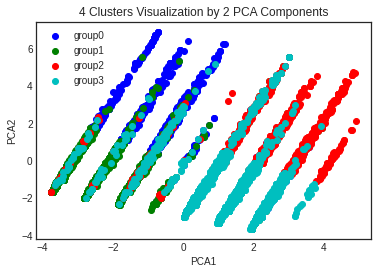

In [466]:
df_pca2 = df.copy()

pca = PCA(n_components = 2)
pca_transformed = pca.fit_transform(df_pca2.drop('cluster', axis=1))

df_pca2['x'] = pca_transformed[:, 0]
df_pca2['y'] = pca_transformed[:, 1]

group0 = df_pca2[df_pca2['cluster'] == 0].index
group1 = df_pca2[df_pca2['cluster'] == 1].index
group2 = df_pca2[df_pca2['cluster'] == 2].index
group3 = df_pca2[df_pca2['cluster'] == 3].index

plt.scatter(x = df_pca2.loc[group0, 'x'], y = df_pca2.loc[group0, 'y'], color = 'b', alpha = 1)
plt.scatter(x = df_pca2.loc[group1, 'x'], y = df_pca2.loc[group1, 'y'], color = 'g', alpha = 1)
plt.scatter(x = df_pca2.loc[group2, 'x'], y = df_pca2.loc[group2, 'y'], color = 'r', alpha = 1)
plt.scatter(x = df_pca2.loc[group3, 'x'], y = df_pca2.loc[group3, 'y'], color = 'c', alpha = 1)


plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('4 Clusters Visualization by 2 PCA Components')
plt.legend(['group0', 'group1', 'group2', 'group3'])
plt.show()

3차원 결과 시각화

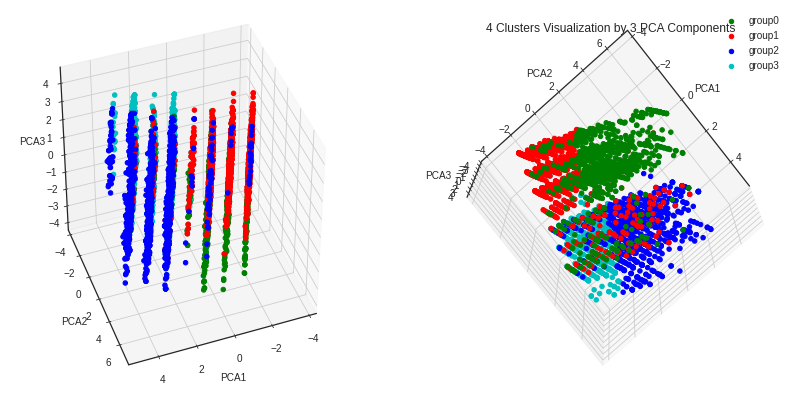

In [467]:
from mpl_toolkits.mplot3d import Axes3D

df_pca3 = df.copy()

pca3 = PCA(n_components = 3)
pca3_transformed = pca3.fit_transform(df_pca3.drop('cluster', axis=1))

df_pca3['x'] = pca3_transformed[:, 0]
df_pca3['y'] = pca3_transformed[:, 1]
df_pca3['z'] = pca3_transformed[:, 2]

group0 = df_pca3[df_pca3['cluster'] == 0].index
group1 = df_pca3[df_pca3['cluster'] == 1].index
group2 = df_pca3[df_pca3['cluster'] == 2].index
group3 = df_pca3[df_pca3['cluster'] == 3].index

fig = plt.figure(figsize = (14, 7))
ax1 = fig.add_subplot(121, projection='3d')

ax1.scatter(xs = df_pca3.loc[group0, 'x'], ys = df_pca3.loc[group0, 'y'], zs = df_pca3.loc[group0, 'z'], color = 'g', alpha = 1)
ax1.scatter(xs = df_pca3.loc[group1, 'x'], ys = df_pca3.loc[group1, 'y'], zs = df_pca3.loc[group1, 'z'], color = 'r', alpha = 1)
ax1.scatter(xs = df_pca3.loc[group2, 'x'], ys = df_pca3.loc[group2, 'y'], zs = df_pca3.loc[group2, 'z'], color = 'b', alpha = 1)
ax1.scatter(xs = df_pca3.loc[group3, 'x'], ys = df_pca3.loc[group3, 'y'], zs = df_pca3.loc[group3, 'z'], color = 'c', alpha = 1)

ax1.set_xlabel('PCA1')
ax1.set_ylabel('PCA2')
ax1.set_zlabel('PCA3')
ax1.view_init(40, 70)

ax2 = fig.add_subplot(122, projection='3d')

ax2.scatter(xs = df_pca3.loc[group0, 'x'], ys = df_pca3.loc[group0, 'y'], zs = df_pca3.loc[group0, 'z'], color = 'g', alpha = 1)
ax2.scatter(xs = df_pca3.loc[group1, 'x'], ys = df_pca3.loc[group1, 'y'], zs = df_pca3.loc[group1, 'z'], color = 'r', alpha = 1)
ax2.scatter(xs = df_pca3.loc[group2, 'x'], ys = df_pca3.loc[group2, 'y'], zs = df_pca3.loc[group2, 'z'], color = 'b', alpha = 1)
ax2.scatter(xs = df_pca3.loc[group3, 'x'], ys = df_pca3.loc[group3, 'y'], zs = df_pca3.loc[group3, 'z'], color = 'c', alpha = 1)

ax2.set_xlabel('PCA1')
ax2.set_ylabel('PCA2')
ax2.set_zlabel('PCA3')
ax2.view_init(100, -40)

plt.title('4 Clusters Visualization by 3 PCA Components')
plt.legend(['group0', 'group1', 'group2', 'group3'])
plt.show()

## Model 2: PCA + Elkan K-Means

In [468]:
# fitting을 다시 하기 전에 실행
df = df.drop(columns = ['cluster'])
df.head(5)

,satisfy,ratings0,ratings1,ratings2,ratings3,ratings4,mon,tue,wed,thu,fri,period
0,5,2,2,4.0,5,1,0,1,0,1,0,6
1,3,2,3,4.0,2,1,0,1,0,1,0,6
2,4,4,3,4.0,4,2,0,1,0,1,0,6
3,5,4,4,3.0,4,5,0,1,0,1,0,6
4,5,3,4,4.0,4,3,0,1,0,1,0,6


K값 찾기

K: 2	Inertia: 234.38855643867885	Difference: -234.38855643867885
K: 3	Inertia: 165.52634019348037	Difference: 68.86221624519848
K: 4	Inertia: 113.7545025707991	Difference: 51.77183762268126
K: 5	Inertia: 94.19533545830546	Difference: 19.55916711249364
K: 6	Inertia: 80.014207295622	Difference: 14.181128162683464
K: 7	Inertia: 68.36643574234218	Difference: 11.647771553279824
K: 8	Inertia: 60.41336909861742	Difference: 7.953066643724753
K: 9	Inertia: 52.91950648599951	Difference: 7.49386261261791
K: 10	Inertia: 46.89418941193796	Difference: 6.0253170740615545


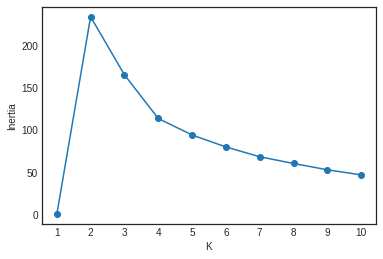

In [469]:
df_kmeans2 = df_pca.copy()

scaler = MinMaxScaler()
X = scaler.fit_transform(df_kmeans[['x', 'y']])

inertia = [0, ]
for i in range(2, 11):
  model = KMeans(n_clusters = i, random_state = 0, algorithm = "elkan")
  model.fit(X)
  inertia.append(model.inertia_)

  print('K: {}\tInertia: {}'.format(i, model.inertia_), end = '\t')

  if i > 1:
    print('Difference: {}'.format(inertia[i-2] - inertia[i-1]))
  else:
    print()

plt.plot(range(1, 11), inertia, marker = 'o')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.show()

In [470]:
# 클러스터 수 = 4
model = KMeans(n_clusters = 4, random_state = 0, algorithm = "elkan")
model.fit(X)

df['cluster'] = model.fit_predict(X)
df.head(5)

,satisfy,ratings0,ratings1,ratings2,ratings3,ratings4,mon,tue,wed,thu,fri,period,cluster
0,5,2,2,4.0,5,1,0,1,0,1,0,6,0
1,3,2,3,4.0,2,1,0,1,0,1,0,6,0
2,4,4,3,4.0,4,2,0,1,0,1,0,6,0
3,5,4,4,3.0,4,5,0,1,0,1,0,6,1
4,5,3,4,4.0,4,3,0,1,0,1,0,6,1


결과 시각화 - Model 1과 차이 없음

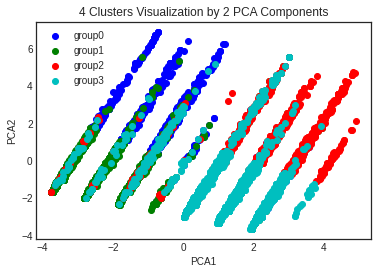

In [345]:
df_pca2 = df.copy()

pca = PCA(n_components = 2)
pca_transformed = pca.fit_transform(df_pca2.drop('cluster', axis=1))

df_pca2['x'] = pca_transformed[:, 0]
df_pca2['y'] = pca_transformed[:, 1]

group0 = df_pca2[df_pca2['cluster'] == 0].index
group1 = df_pca2[df_pca2['cluster'] == 1].index
group2 = df_pca2[df_pca2['cluster'] == 2].index
group3 = df_pca2[df_pca2['cluster'] == 3].index

plt.scatter(x = df_pca2.loc[group0, 'x'], y = df_pca2.loc[group0, 'y'], color = 'b', alpha = 1)
plt.scatter(x = df_pca2.loc[group1, 'x'], y = df_pca2.loc[group1, 'y'], color = 'g', alpha = 1)
plt.scatter(x = df_pca2.loc[group2, 'x'], y = df_pca2.loc[group2, 'y'], color = 'r', alpha = 1)
plt.scatter(x = df_pca2.loc[group3, 'x'], y = df_pca2.loc[group3, 'y'], color = 'c', alpha = 1)


plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('4 Clusters Visualization by 2 PCA Components')
plt.legend(['group0', 'group1', 'group2', 'group3'])
plt.show()

## Spectral Clustering

In [346]:
# fitting을 다시 하기 전에 실행
df = df.drop(columns = ['cluster'])
df.head(5)

,satisfy,ratings0,ratings1,ratings2,ratings3,ratings4,mon,tue,wed,thu,fri,period
0,5,2,2,4.0,5,1,0,1,0,1,0,6
1,3,2,3,4.0,2,1,0,1,0,1,0,6
2,4,4,3,4.0,4,2,0,1,0,1,0,6
3,5,4,4,3.0,4,5,0,1,0,1,0,6
4,5,3,4,4.0,4,3,0,1,0,1,0,6


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


K: 2	Silhouette Score: 0.05469431412103785	


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


K: 3	Silhouette Score: -0.19033389414561694	Difference: 0.24502820826665478


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


K: 4	Silhouette Score: -0.0712247431525186	Difference: -0.11910915099309834


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


K: 5	Silhouette Score: -0.23838473655862755	Difference: 0.16715999340610893


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


K: 6	Silhouette Score: -0.25896615004917534	Difference: 0.02058141349054779


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


K: 7	Silhouette Score: -0.31482440382015237	Difference: 0.05585825377097703


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


K: 8	Silhouette Score: -0.32611325146484343	Difference: 0.011288847644691069


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


K: 9	Silhouette Score: -0.3736452636698549	Difference: 0.047532012205011465


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


K: 10	Silhouette Score: -0.33635170521610364	Difference: -0.03729355845375126


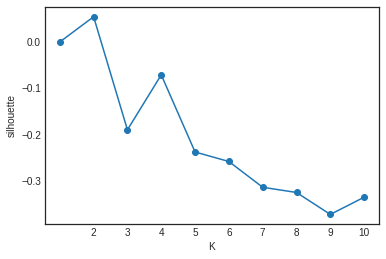

In [347]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

df_spec = df_pca.copy()

scaler = MinMaxScaler()
X = scaler.fit_transform(df_spec[['x', 'y']])

silhouette = [0]
for i in range(2, 11):
  model = SpectralClustering(n_clusters = i, affinity='nearest_neighbors', random_state = 0).fit(X)
  labels = model.labels_
  silhouette.append(silhouette_score(X, labels, metric='euclidean'))

  print('K: {}\tSilhouette Score: {}'.format(i, silhouette[i-1]), end = '\t')

  if i > 2:
    print('Difference: {}'.format(silhouette[i-2] - silhouette[i-1]))
  else:
    print()

plt.plot(range(1, 11), silhouette, marker = 'o')
plt.xlabel('K')
plt.ylabel('silhouette')
plt.xticks(range(2, 11))
plt.show()

실루엣 계수가 의미 있는 값을 보이지 않아서 Spectral Clustering은 진행하지 않는 것으로 결정

## 결과 분석

Model 1을 선택하기로 결정

1. Model 1, 2의 결과가 동일하다.

2. Model 3에서 사용된 알고리즘은 Fully connected된 Graph에 대한 문제일 경우에만 분석이 유의미해질 수 있기 때문이다.

#### **아래 코드 블럭을 실행하기 전에 Model 1의 코드를 다시 실행한다.**

각 Cluster에 해당하는 강의평 수 계산

In [411]:
df.groupby('cluster').count()

,satisfy,ratings0,ratings1,ratings2,ratings3,ratings4,mon,tue,wed,thu,fri,period
cluster,,,,,,,,,,,,
0,1092,1092,1092,1092,1092,1092,1092,1092,1092,1092,1092,1092
1,2084,2084,2084,2084,2084,2084,2084,2084,2084,2084,2084,2084
2,1007,1007,1007,1007,1007,1007,1007,1007,1007,1007,1007,1007
3,1737,1737,1737,1737,1737,1737,1737,1737,1737,1737,1737,1737


각 Cluster의 center 추출

In [412]:
df.groupby('cluster').mean()

,satisfy,ratings0,ratings1,ratings2,ratings3,ratings4,mon,tue,wed,thu,fri,period
cluster,,,,,,,,,,,,
0,3.134615,3.393773,3.139194,3.158425,2.636447,2.749084,0.415751,0.446886,0.431319,0.440476,0.178571,5.512821
1,4.575816,3.903071,3.576775,4.180422,4.259597,4.439539,0.356526,0.543186,0.414107,0.536948,0.126200,5.929942
2,3.006951,3.287984,3.147964,2.995035,2.478649,2.718967,0.425025,0.568024,0.444886,0.552135,0.129096,1.859980
3,4.442142,3.873921,3.617732,4.029361,4.187680,4.305699,0.454807,0.527346,0.477260,0.500864,0.082902,2.064479


## output csv 파일 생성

In [413]:
output = df.copy()
output = output.sort_values(by = 'cluster', ascending = True)

In [414]:
output

,satisfy,ratings0,ratings1,ratings2,ratings3,ratings4,mon,tue,wed,thu,fri,period,cluster
0,5,2,2,4.0,5,1,0,1,0,1,0,6,0
701,3,4,4,1.0,3,3,0,1,0,1,0,6,0
3412,4,3,4,3.0,2,4,1,0,1,0,0,5,0
3415,3,5,5,3.0,3,4,1,0,1,0,0,5,0
3423,4,5,4,3.0,3,3,0,1,0,1,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,5,3,3,3.0,4,5,1,0,1,0,0,1,3
739,5,5,3,3.0,3,4,1,0,1,0,0,1,3
738,5,4,3,3.0,4,4,1,0,1,0,0,1,3
664,4,5,5,5.0,4,5,1,0,1,0,0,2,3


In [415]:
original = pd.read_csv(path + 'dataset.csv')
output['comment'] = original['comment']
output.head(5)

,satisfy,ratings0,ratings1,ratings2,ratings3,ratings4,mon,tue,wed,thu,fri,period,cluster,comment
0,5,2,2,4.0,5,1,0,1,0,1,0,6,0,코로나임에도 불구하고 최대한 학생들과 소통하시려고 노력하시는 참교수님이십니다.\n개...
701,3,4,4,1.0,3,3,0,1,0,1,0,6,0,ㅎㅎ이 강의를 들으셔야 한다면 c언어를 독학하시는 걸 추천드립니다. 교수님이 수업안...
3412,4,3,4,3.0,2,4,1,0,1,0,0,5,0,매일 나오는 퀴즈타임만 잘 견디면 좋은 학점 가능.\n시험도 안보고 텀프로젝트도 쉬...
3415,3,5,5,3.0,3,4,1,0,1,0,0,5,0,수업을 진행 할 때 마다 실습과제를 내어주시는데 크게 어렵지 않고 해결하면서 배우는...
3423,4,5,4,3.0,3,3,0,1,0,1,0,5,0,참 별 내용 없는데 장황하게 설명하고 강의자료 지저분한건 김현철교수님 트레이드마크니...


In [416]:
output.to_csv('output.csv')

Wordcloud를 그리기 위한 별도의 output 파일 생성

In [417]:
cluster_output = output[['cluster', 'comment']]
cluster_output

,cluster,comment
0,0,코로나임에도 불구하고 최대한 학생들과 소통하시려고 노력하시는 참교수님이십니다.\n개...
701,0,ㅎㅎ이 강의를 들으셔야 한다면 c언어를 독학하시는 걸 추천드립니다. 교수님이 수업안...
3412,0,매일 나오는 퀴즈타임만 잘 견디면 좋은 학점 가능.\n시험도 안보고 텀프로젝트도 쉬...
3415,0,수업을 진행 할 때 마다 실습과제를 내어주시는데 크게 어렵지 않고 해결하면서 배우는...
3423,0,참 별 내용 없는데 장황하게 설명하고 강의자료 지저분한건 김현철교수님 트레이드마크니...
...,...,...
740,3,중간고사는 되게 쉬운 편이에요 !\n기말고사는 중간 이후 수업을 열심히 듣지 않는다...
739,3,기초통계학에 대해 적절한 수준에 맞추어 강의를 진행해 나가십니다. 수업 시간은 거의...
738,3,2020년 2학기의 차재형 교수님의 기초통계학 수업은 금요일 1-2교시에 매번 실시...
664,3,송주원교수님답게 설명이 많으십니다. 그치만 정리는 우리의 몫..\n그 누구보다 이해...


In [418]:
cluster_output.to_csv('cluster_output.csv')

## Wordcloud 생성 과정

한글 깨짐 방지용 폰트 설정

In [359]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 4 dirs
/usr/share/fonts/truetype/dejavu: caching, new cache contents: 22 fonts, 0 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconf

In [360]:
import os
import re
import pandas as pd
from konlpy.tag import Kkma
from konlpy.tag import Okt
import tqdm
from wordcloud import WordCloud

In [419]:
data = pd.read_csv('cluster_output.csv')

Wordcloud 생성 전 기본값 지정

In [420]:
nlp=Okt()
font_path = 'usr/share/fonts/truetype/nanum/NanumGothic.ttf'
ignore=['있습니다','같아요','합니다','추천','내용','학점','시험','중간','문제','강의','과제','수업','추천','생각','교수','같습니다','공부','입니다','도','은','는','이','가','하','아','것','들','의','있','되','수','보','주','등','한']

불용어뿐만 아니라, 내용, 학점, 시험 등 모든 cluster에서 큰 비중으로 나타나는 단어들도 제외

**1) 0번째 cluster에 대한 Wordcloud**

In [474]:
mask_0 = data['cluster'].isin([0])
doc_0 = data[mask_0]
doc_0 = doc_0.loc[:,['comment']]

In [475]:
doc_0.head()

,comment
0,코로나임에도 불구하고 최대한 학생들과 소통하시려고 노력하시는 참교수님이십니다.\n개...
1,ㅎㅎ이 강의를 들으셔야 한다면 c언어를 독학하시는 걸 추천드립니다. 교수님이 수업안...
2,매일 나오는 퀴즈타임만 잘 견디면 좋은 학점 가능.\n시험도 안보고 텀프로젝트도 쉬...
3,수업을 진행 할 때 마다 실습과제를 내어주시는데 크게 어렵지 않고 해결하면서 배우는...
4,참 별 내용 없는데 장황하게 설명하고 강의자료 지저분한건 김현철교수님 트레이드마크니...


In [476]:
sentence0_list=[]

for item in doc_0['comment']:
  sentence0_list.append(item[:-1])

In [477]:
sentence0_tag=[]
for sentence in sentence0_list:
  morph = nlp.pos(sentence)
  sentence0_tag.append(morph)

In [478]:
word0_list=[]

for sentence in sentence0_tag:
  for word, tag in sentence:
    if tag in ['Noun']:
      word0_list.append(word)
    if tag in ['Adjective']:
      word0_list.append(word)

In [479]:
word0_list[:5]

['코로나', '임', '불구', '최대한', '학생']

In [480]:
if ignore:
  word_0=[token for token in word0_list if not token in ignore and len(token)>1]

In [481]:
len(word_0)

29247

In [482]:
word0_count = {}

for w in word_0:
  if w in word0_count:
    word0_count[w]+=1
  else:
    word0_count[w]=1

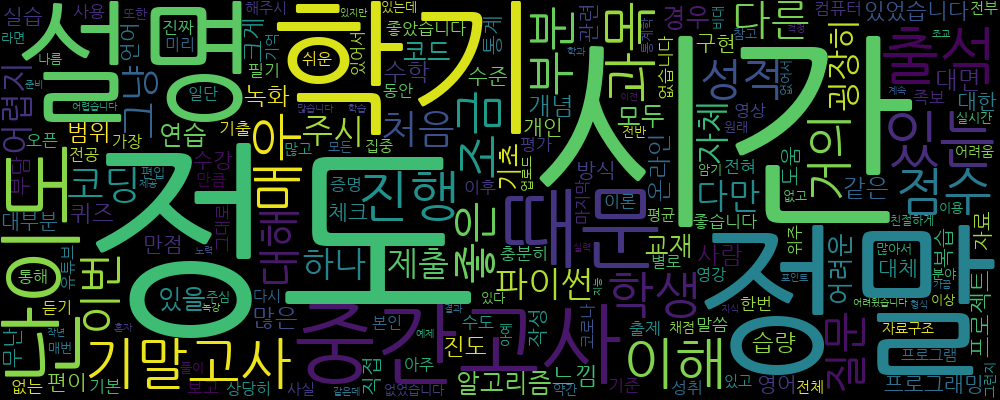

In [483]:
wc = WordCloud(width=1000, height=400, font_path=font_path)
cloud=wc.fit_words(word0_count)
cloud.to_image()

**2) 1번째 cluster에 대한 Wordcloud**

In [484]:
mask_1 = data['cluster'].isin([1])
doc_1 = data[mask_1]
doc_1 = doc_1.loc[:,['comment']]

In [485]:
doc_1.head()

,comment
1092,"텀프가 매우매우 어려운 수업입니다. 저는 과제 만점받긴했는데, 정말 힘들었어요. 성..."
1093,교수님께서 강의력은 정말 좋으십니다. C언어를 기본적으로 알고 있어야 따라갈 수 있...
1094,강의목표답게 정말 프로그래밍에 대해서 아무것도 모르는 초보자도 따라올 수 있도록 강...
1095,영어로 배우다보니 원래 알고 있던 개념도 새로운 것처럼 느껴지긴 합니다. 그래도 교...
1096,"시험, 과제 모두 코딩해서 블랙보드에 제출하는 방식으로 진행합니다. C언어 공부 열..."


In [486]:
sentence1_list=[]

for item in doc_1['comment']:
  sentence1_list.append(item[:-1])

In [487]:
sentence1_tag=[]
for sentence in sentence1_list:
  morph = nlp.pos(sentence)
  sentence1_tag.append(morph)

In [488]:
word1_list=[]

for sentence in sentence1_tag:
  for word, tag in sentence:
    if tag in ['Noun']:
      word1_list.append(word)
    if tag in ['Adjective']:
      word1_list.append(word)

In [489]:
word1_list[:5]

['텀프', '매우', '매우', '어려운', '수업']

In [490]:
if ignore:
  word_1=[token for token in word1_list if not token in ignore and len(token)>1]

In [491]:
len(word_1)

53143

In [492]:
word1_count = {}

for w in word_1:
  if w in word1_count:
    word1_count[w]+=1
  else:
    word1_count[w]=1

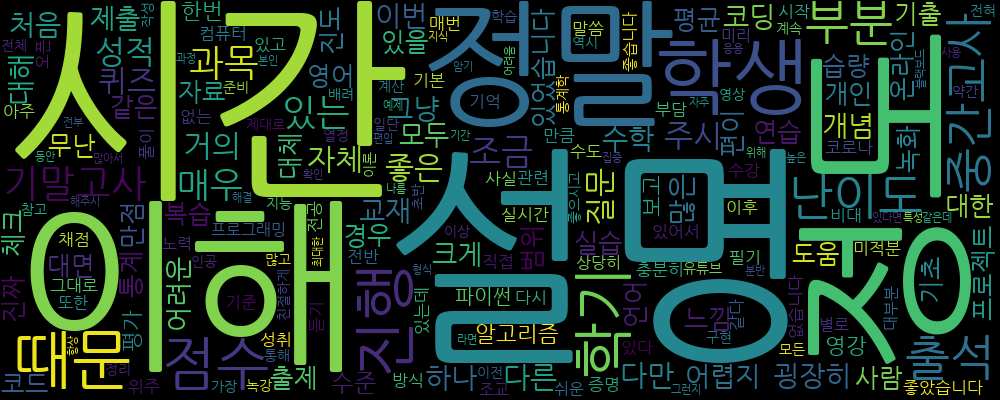

In [493]:
wc = WordCloud(width=1000, height=400, font_path=font_path)
cloud=wc.fit_words(word1_count)
cloud.to_image()

**3) 2번째 cluster에 대한 Wordcloud**

In [494]:
mask_2 = data['cluster'].isin([2])
doc_2 = data[mask_2]
doc_2 = doc_2.loc[:,['comment']]

In [495]:
doc_2.head()

,comment
3176,"학점 미화...? 솔직히 말하자면 초반 3주 정도 듣고, 중간 기말 전에 리뷰 강의..."
3177,강의 내내 일관성이 떨어지고 중구난방인 수업으로 느껴졌습니다.\n초반에는 '정보'에...
3178,교수님 정말 착하시요 ! 수업도 정말 재밌고 다시 듣는다면 꼭 이 강의를 듣고 싶습...
3179,"무슨내용을 전달하려는지 알 수 없고,\n배워가는게 전혀 없는 느낌"
3180,수업을 통해서 인공지능에 대해 공부하려고 한다면 추천하지 않습니다. 오로지 학점을 ...


In [496]:
sentence2_list=[]

for item in doc_2['comment']:
  sentence2_list.append(item[:-1])

In [497]:
sentence2_tag=[]
for sentence in sentence2_list:
  morph = nlp.pos(sentence)
  sentence2_tag.append(morph)

In [498]:
word2_list=[]

for sentence in sentence2_tag:
  for word, tag in sentence:
    if tag in ['Noun']:
      word2_list.append(word)
    if tag in ['Adjective']:
      word2_list.append(word)

In [499]:
word2_list[:5]

['학점', '미화', '솔직히', '말', '초반']

In [500]:
if ignore:
  word_2=[token for token in word2_list if not token in ignore and len(token)>1]

In [501]:
len(word_2)

25192

In [502]:
word2_count = {}

for w in word_2:
  if w in word2_count:
    word2_count[w]+=1
  else:
    word2_count[w]=1

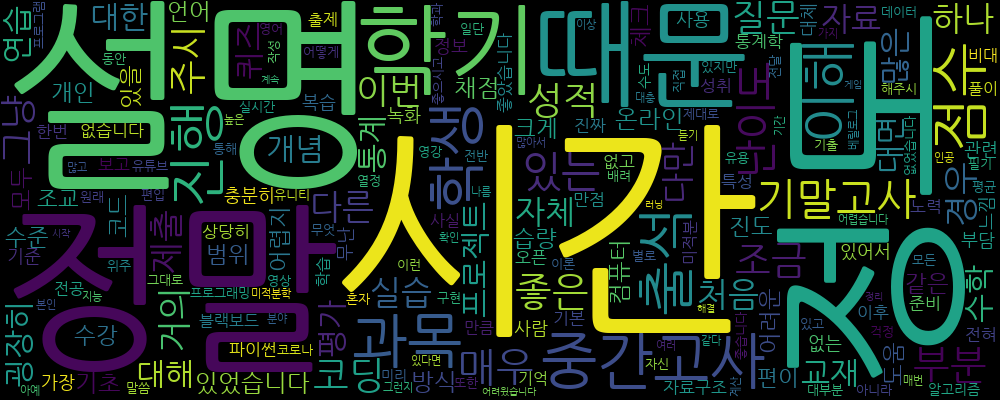

In [503]:
wc = WordCloud(width=1000, height=400, font_path=font_path)
cloud=wc.fit_words(word2_count)
cloud.to_image()

**4) 3번째 cluster에 대한 Wordcloud**

In [504]:
mask_3 = data['cluster'].isin([3])
doc_3 = data[mask_3]
doc_3 = doc_3.loc[:,['comment']]

In [505]:
doc_3.head()

,comment
4183,"수업시간에 교수님의 설명을 들으면 생각보다 할만 한 것 같지만, 과제가 너무 어렵습..."
4184,수업자체는 어렵지 않습니다 - 진도가 느리고 쉽지만 매우 졸립니다.\n\n\n그에 ...
4185,- 블랙보드를 통해 출석을 체크하심. 출석에 관해서는 매우 관대하신 편인듯.\n- ...
4186,백정민=족보\n족보에서 거의 그대로 나오거나 숫자만 바꾸어 나오거나 합니당 \n저는...
4187,저는 결론적 최종과제를 제출하지 않아 F를 받았지만.. 열심히 했다면 정말 정말 도...


In [506]:
sentence3_list=[]

for item in doc_3['comment']:
  sentence3_list.append(item[:-1])

In [507]:
sentence3_tag=[]
for sentence in sentence3_list:
  morph = nlp.pos(sentence)
  sentence3_tag.append(morph)

In [508]:
word3_list=[]

for sentence in sentence3_tag:
  for word, tag in sentence:
    if tag in ['Noun']:
      word3_list.append(word)
    if tag in ['Adjective']:
      word3_list.append(word)

In [509]:
word3_list[:5]

['수업', '시간', '교수', '설명', '생각']

In [510]:
if ignore:
  word_3=[token for token in word3_list if not token in ignore and len(token)>1]

In [511]:
len(word_3)

45545

In [512]:
word3_count = {}

for w in word_3:
  if w in word3_count:
    word3_count[w]+=1
  else:
    word3_count[w]=1

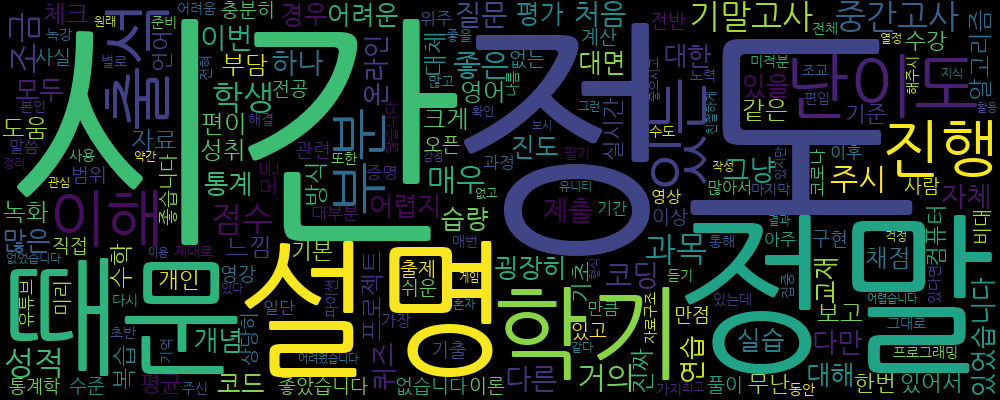

In [513]:
wc = WordCloud(width=1000, height=400, font_path=font_path)
cloud=wc.fit_words(word3_count)
cloud.to_image()

## 학습 모델 저장

In [473]:
import joblib
joblib.dump(model, 'clustering.pkl')

['clustering.pkl']